### Data Analysis Best Book DS 📚

#### Libraries:

In [2]:
#Database management
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_columns', None)

#Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Stats
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

I upload the previously cleaned dataset (in notebook ``1_EDA.ipynb``)

In [3]:
best = pd.read_csv('Data/best_clean.csv')

In [ ]:
best.info()

 The datetime format is not preserved because CSV files are plain text and do not store formatting information. However, the datetime data itself is stored.
 So I will parse it back into datetime objects when you read the file again

In [5]:
best = pd.read_csv('best_clean.csv', parse_dates=['publishdate', 'firstpublishdate'])

In [6]:
print(best['publishdate'].dtype)
print(best['firstpublishdate'].dtype)

datetime64[ns]
datetime64[ns]


In [7]:
best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   bookid            52478 non-null  object        
 1   title             52478 non-null  object        
 2   series            52478 non-null  object        
 3   author            52478 non-null  object        
 4   rating            52478 non-null  float64       
 5   description       52478 non-null  object        
 6   language          52478 non-null  object        
 7   isbn              52478 non-null  object        
 8   genres            52478 non-null  object        
 9   characters        52478 non-null  object        
 10  bookformat        52478 non-null  object        
 11  edition           52478 non-null  object        
 12  pages             52478 non-null  int64         
 13  publisher         52478 non-null  object        
 14  publishdate       5069

In [8]:
#Trying to fill null values in 'firstpublishdate'
fill_value = {'firstpublishdate': pd.NaT}
best.fillna(value=fill_value, inplace=True)

In [9]:
#adding a column with the number of awards for each book:
#convert string representation of list to actual list
def count_awards(awards_str):
    if not awards_str or awards_str == '[]':
        return 0
    awards_list = eval(awards_str)  
    return len(awards_list)

best['num_awards'] = best['awards'].apply(count_awards)


#### Data Dictionary 🧾
- bookId: Book Identifier as in goodreads.com	
- title: Book title
- series: Series Name	
- author: Book's Author	
- rating: Global goodreads rating
- description: Book's description	
- language: Book's language
- isbn: Book's ISBN	
- genres: Book's genres	
- characters: Main characters	
- bookFormat: Type of binding	
- edition: Type of edition (ex. Anniversary Edition)
- pages: Number of pages
- publisher: Editorial
- publishDate: publication date
- firstPublishDate: Publication date of first edition
- awards: List of awards
- numRatings: Number of total ratings
- likedPercent: Derived field, percent of ratings over 2 starts (as in GoodReads)
- setting: Story setting
- coverImg: URL to cover image	
- bbeScore: Score in Best Books Ever list
- bbeVotes: Number of votes in Best Books Ever list	
- price: Book's price (extracted from Iberlibro)
- 5_stars: Number of ratings by 5 stars
- 4_stars: Number of ratings by 4 stars
- 3_stars: Number of ratings by 3 stars
- 2_stars: Number of ratings by 2 stars
- 1_star: Number of ratings by 1 star
- num_awards: Number of awards for each book


#### Descriptive Analysis 👀

In [10]:
#Let's calculate  the basic statistics for numerical columns with a dictionary
numerical_columns = ['rating', 'pages', 'price', 'numratings', 'likedpercent', 
                     '5_star', '4_star', '3_star', '2_star', '1_star']

statistics = {
    'mean': best[numerical_columns].mean(),
    'median': best[numerical_columns].median(),
    'std_dev': best[numerical_columns].std()
}

statistics_df = pd.DataFrame(statistics)


In [11]:
statistics_df

,mean,median,std_dev
rating,4.021878,4.03,0.367146
pages,313.822211,297.00,255.694651
price,751.601300,346.00,5152.401782
numratings,17878.649263,2307.00,103944.778529
likedpercent,92.231545,93.00,5.955080
5_star,7281.773848,817.00,50730.601361
4_star,5976.136629,768.00,31629.781356
3_star,3316.638706,452.50,16969.581313
2_star,902.568372,108.00,5582.056655
1_star,401.272667,36.00,3713.285274


In [12]:
best['price'].value_counts()

price
0.0        14365
520.0        626
286.0        558
522.0        548
312.0        526
           ...  
5103.0         1
7581.0         1
11243.0        1
8654.0         1
2770.0         1
Name: count, Length: 3717, dtype: int64

In [13]:
#Seems that the variable price has some unrealistic prices...let's try to figure out or fix it
#After checking the web source of the prices IberLibro, it seemps that there is just a formatting issue.

best['price'] = best['price'] / 10

Important! Some prices may seem very low because they are scrapped from a website that sells second hand books
I double checked some ISBN codes of the books in Amazon, and the prices are similar in books published a long ago, that have second-hand option, so for now I'll leave it as it is.

In [14]:
#Let's run this again:
numerical_columns = ['rating', 'pages', 'price', 'numratings', 'likedpercent', 
                     '5_star', '4_star', '3_star', '2_star', '1_star']

statistics = {
    'mean': best[numerical_columns].mean(),
    'median': best[numerical_columns].median(),
    'std_dev': best[numerical_columns].std()
}

statistics_df = pd.DataFrame(statistics)

In [15]:
statistics_df

,mean,median,std_dev
rating,4.021878,4.03,0.367146
pages,313.822211,297.00,255.694651
price,75.160130,34.60,515.240178
numratings,17878.649263,2307.00,103944.778529
likedpercent,92.231545,93.00,5.955080
5_star,7281.773848,817.00,50730.601361
4_star,5976.136629,768.00,31629.781356
3_star,3316.638706,452.50,16969.581313
2_star,902.568372,108.00,5582.056655
1_star,401.272667,36.00,3713.285274


In [16]:
#Count and percentage distributions for Categorical columns (same method as before):

#The list of categorical columns
categorical_columns = ['language', 'bookformat', 'publisher', 'series', 'author']


categorical_stats = {}
for column in categorical_columns:
    counts = best[column].value_counts()
    percentages = best[column].value_counts(normalize=True) * 100
    #Store counts and percentages in the dictionary
    categorical_stats[column] = pd.DataFrame({'count': counts, 'percentage': percentages})
#Create a dataframe from the dictionary for better visualization
concatenated_stats = pd.concat(
    [stats.assign(category=column) for column, stats in categorical_stats.items()]
)
concatenated_stats.reset_index(inplace=True)
concatenated_stats.rename(columns={'index': 'value'}, inplace=True)

concatenated_stats



,value,count,percentage,category
0,English,42661,81.293113,language
1,Unknown,3806,7.252563,language
2,Arabic,1038,1.977972,language
3,Spanish,687,1.309120,language
4,French,579,1.103319,language
...,...,...,...,...
62355,Gesine Bullock-Prado,1,0.001906,author
62356,Emine Şenlikoğlu,1,0.001906,author
62357,Hugo Ortega,1,0.001906,author
62358,Andrew Apple(Goodreads Author),1,0.001906,author


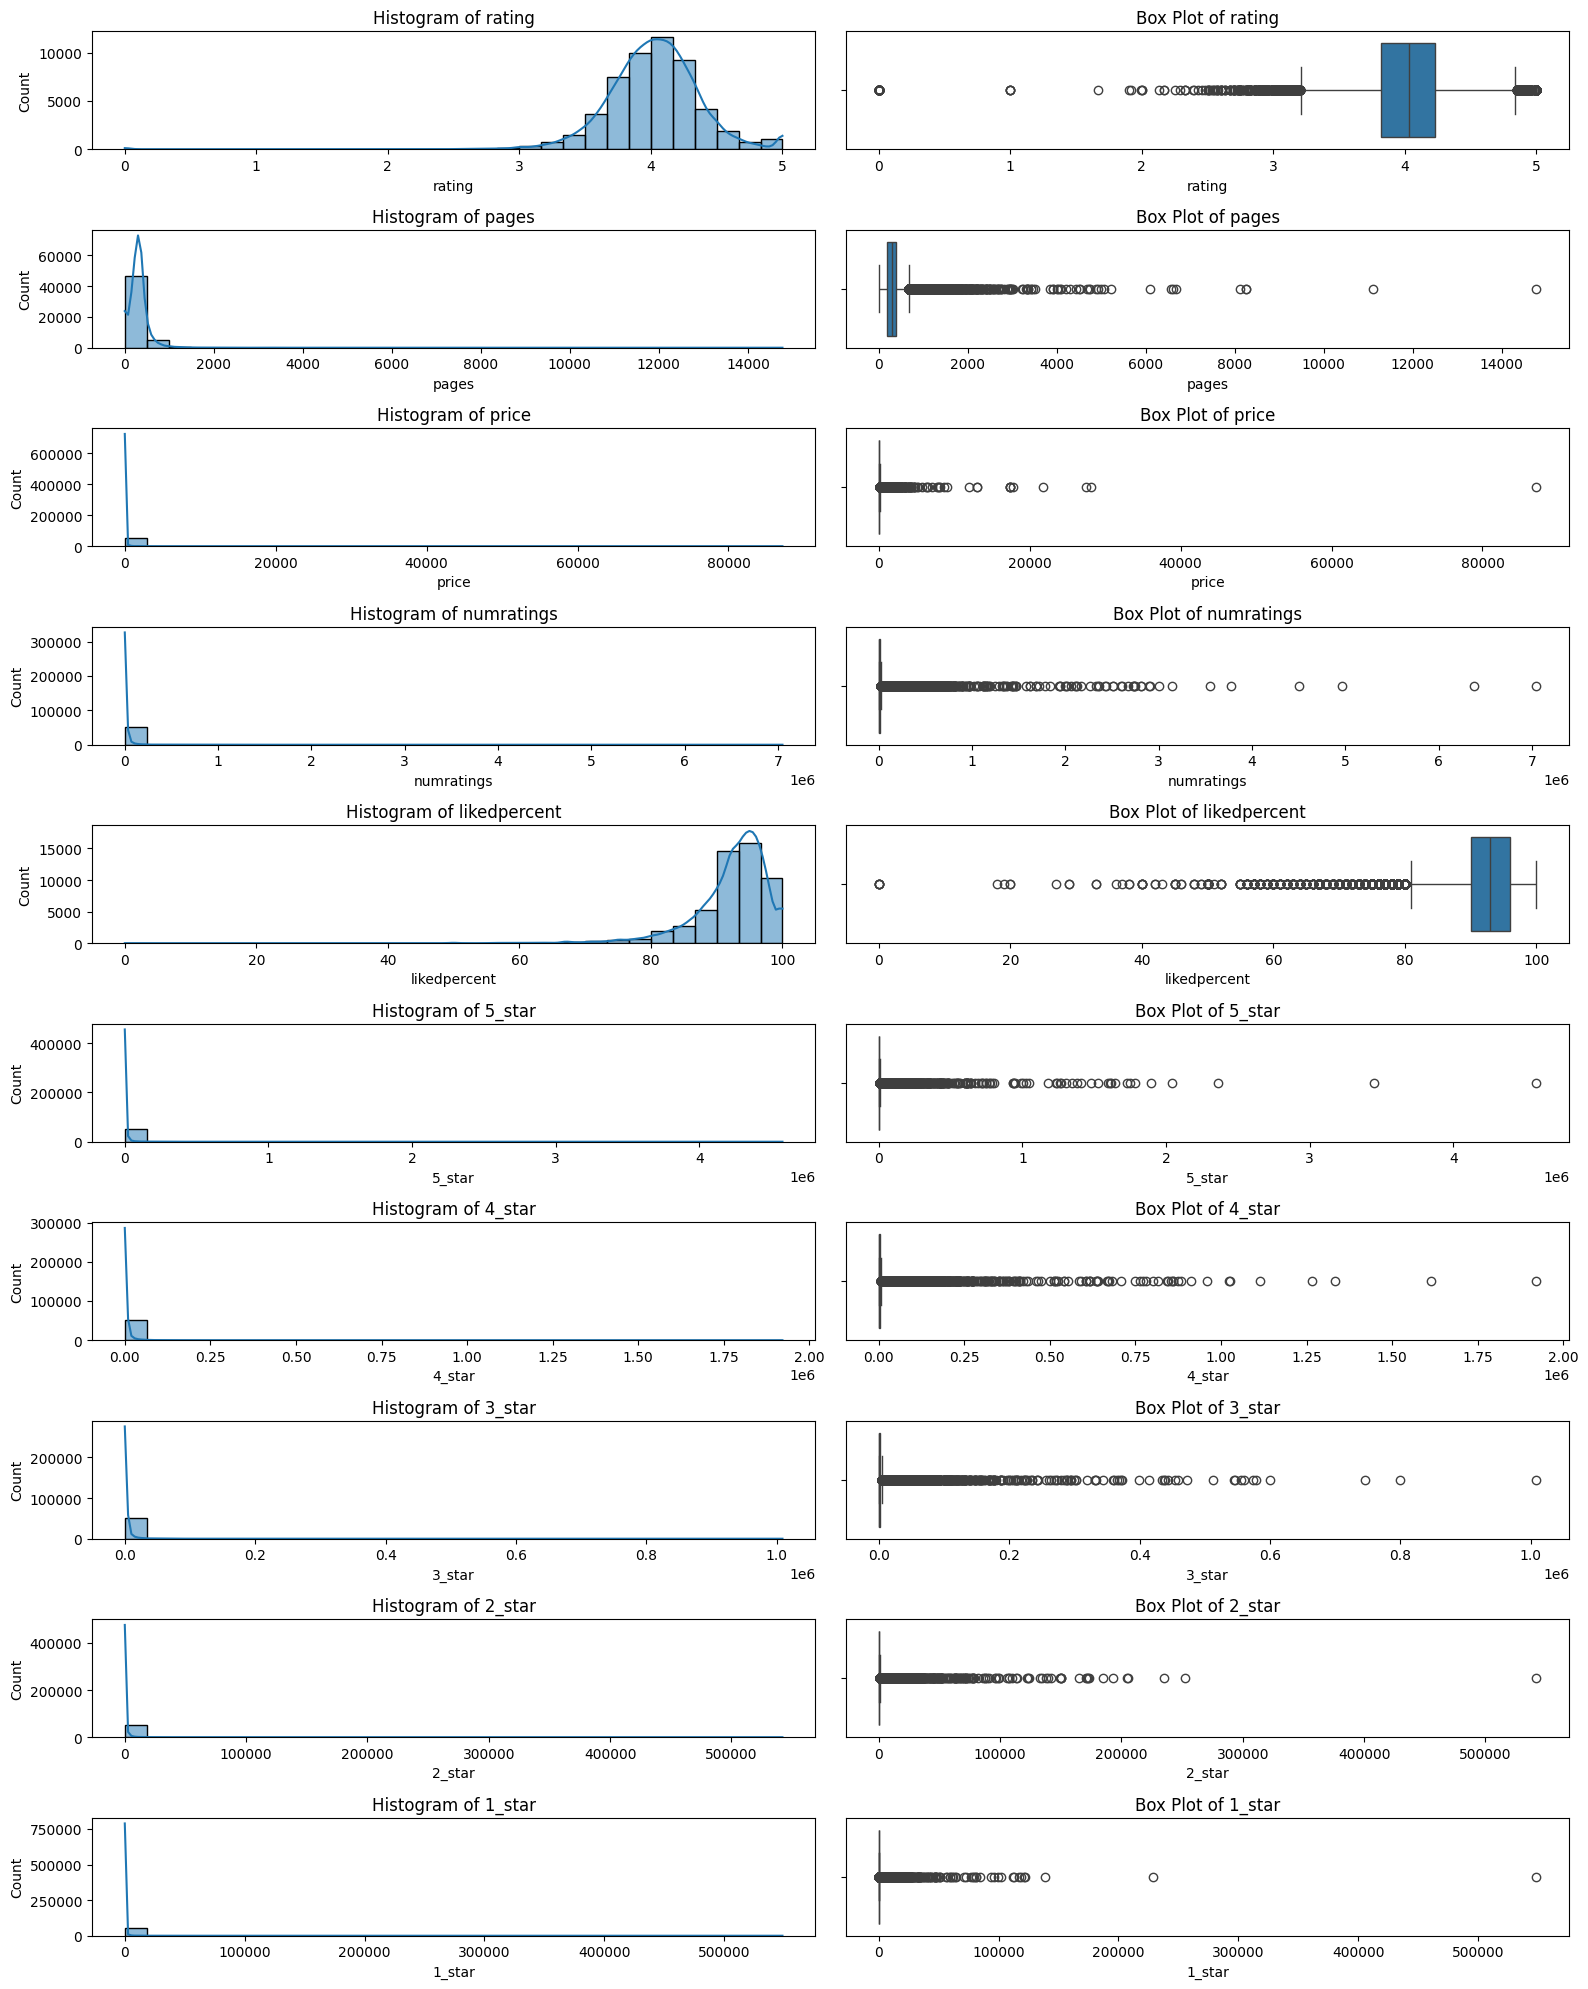

In [17]:
#Distributions and Visualizations
#NUMERICAL COLUMNS
plt.figure(figsize=(16, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, i*2-1)
    sns.histplot(best[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    
    plt.subplot(len(numerical_columns), 2, i*2)
    sns.boxplot(x=best[column])
    plt.title(f'Box Plot of {column}')
    
plt.tight_layout()
plt.show()

All the ouliers that can be clearly seen and all the 0 values will be dealed with in the Regression Model notebook, in the pre-processing of data for fitting the model

In [18]:
best['pages'].value_counts().nlargest(20)

pages
0      2511
320    1049
352     887
288     871
304     791
256     788
336     755
384     754
224     689
240     642
368     639
192     634
272     594
400     578
208     525
416     519
160     439
432     419
448     365
176     365
Name: count, dtype: int64

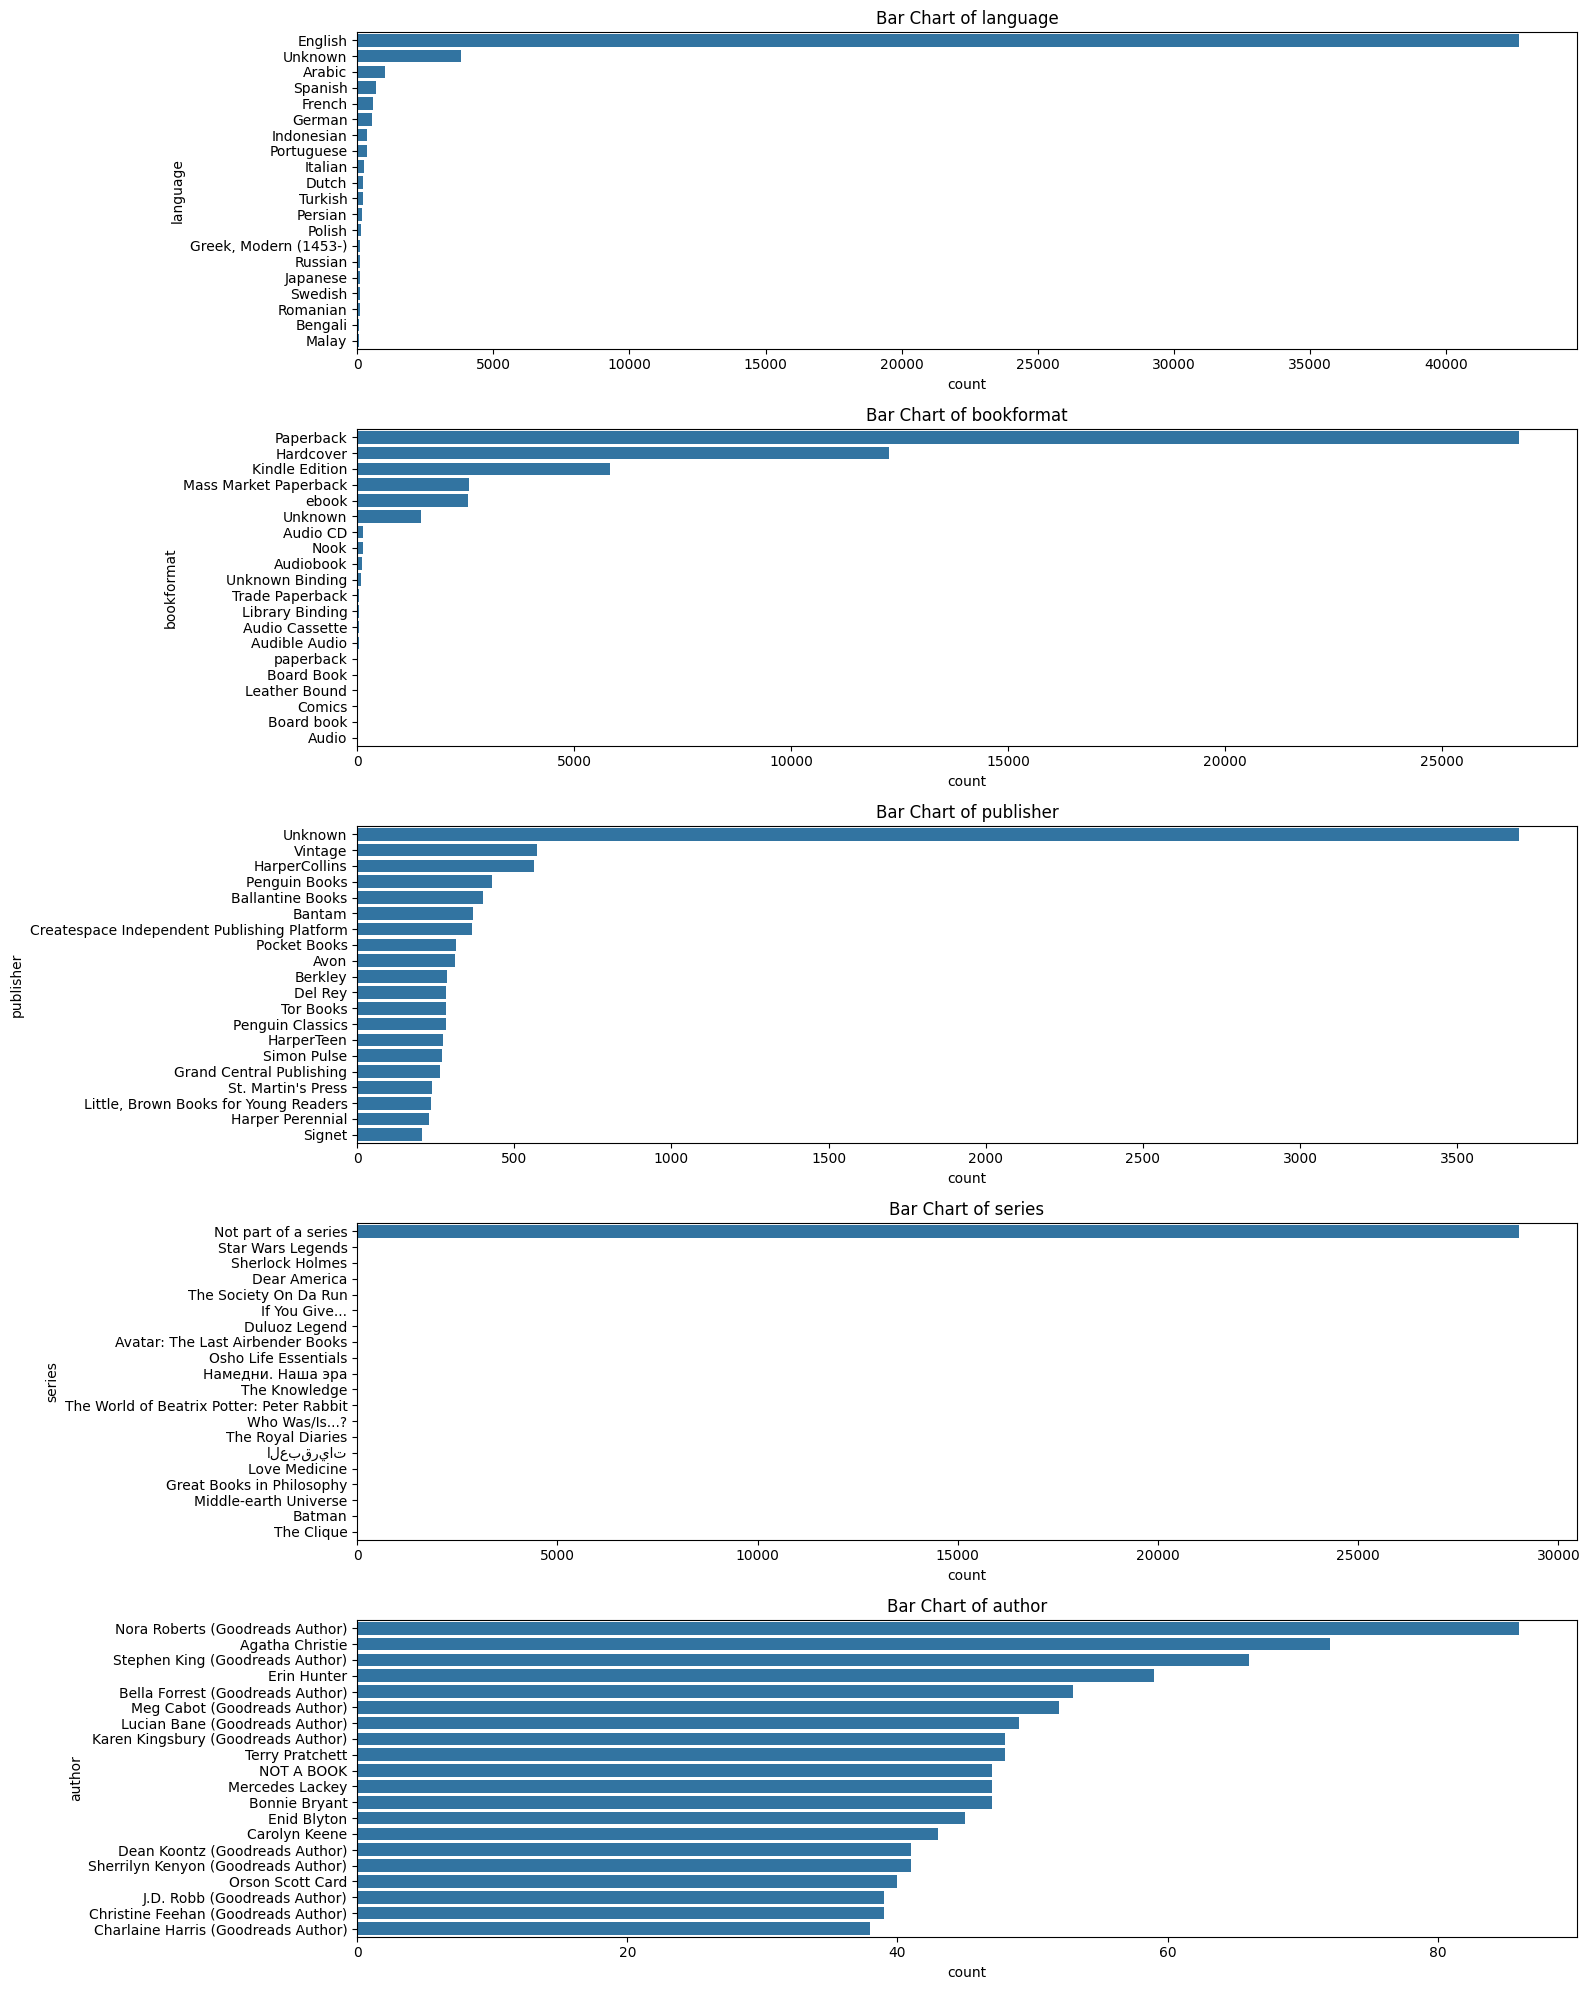

In [19]:
#CATEGORICAL COLUMNS
plt.figure(figsize=(16, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    counts = best[column].value_counts().nlargest(20)  # Show top 20 for better visualization
    sns.barplot(x=counts, y=counts.index)
    plt.title(f'Bar Chart of {column}')
    
plt.tight_layout()
plt.show()

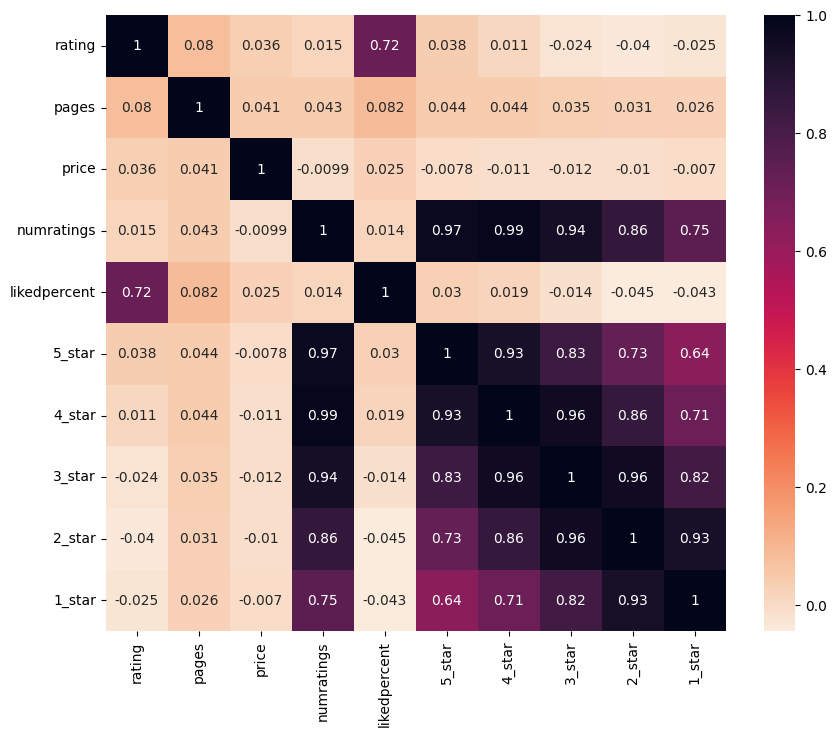

In [20]:
#Correlation matrix
corr = best[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='rocket_r')
figsize=(10, 8)

In [21]:
#Genre and rating analysis:
#Genre preprocessing:

best['genres'] = best['genres'].apply(lambda x: x.split(','))

``.explode()`` Transform each element of a list-like to a row, replicating index values.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html

In [22]:
#each genre will have its own column
exploded_best = best.explode('genres')

#calculate the average rating and number of ratings for each genre
genre_stats = exploded_best.groupby('genres').agg({
    'rating': ['mean', 'count'],
    'numratings': 'sum'
}).reset_index()

#rename the columns
genre_stats.columns = ['genre', 'average_rating', 'num_books', 'total_numratings']

#sort the dataframe by number of books in each genre
genre_stats = genre_stats.sort_values(by='num_books', ascending=False)

genre_stats

,genre,average_rating,num_books,total_numratings
598,'Fiction',3.992486,23891,624600356
1365,'Romance',3.975493,11481,266978085
387,'Contemporary',3.924548,9360,223138888
583,'Fantasy',4.001616,8959,232299163
1747,'Young Adult',4.025598,8153,219351567
...,...,...,...,...
1875,['Civil War'],3.800000,1,15
702,'Go',3.840000,1,3767
1873,['Church',4.160000,1,1811
706,'Goddess'],4.280000,1,3199


- so the genre with the highest number of books is 'Fiction'
- followed by 'Romance', 'Contemporary', 'Fantasy', 'Young Adult'

C:\Users\Elsa\AppData\Local\Temp\ipykernel_6204\2764620252.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_books', y='genre', data=top_genres, palette='viridis')


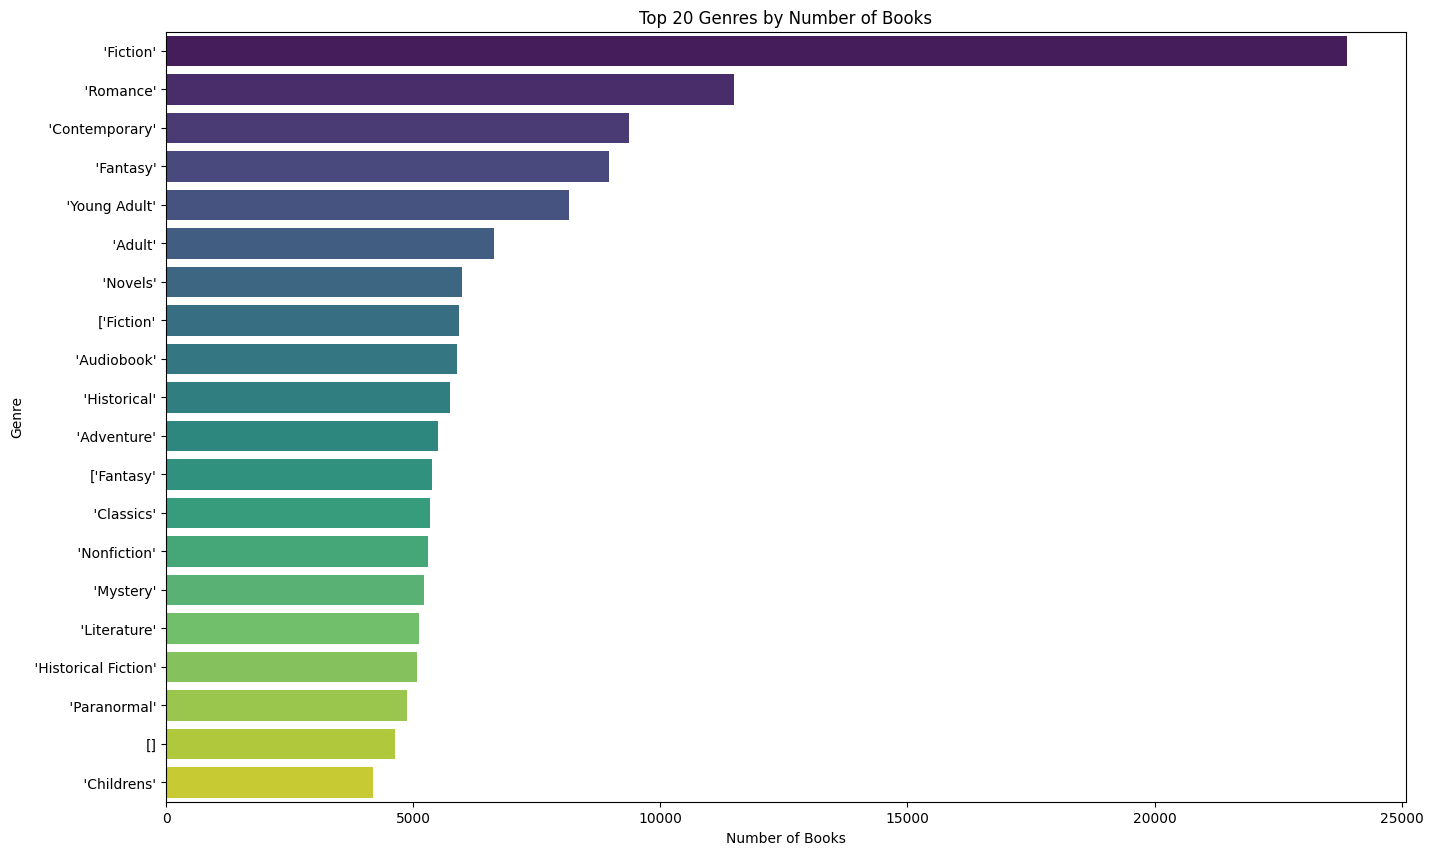

C:\Users\Elsa\AppData\Local\Temp\ipykernel_6204\2764620252.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_rating', y='genre', data=top_genres, palette='viridis')
C:\Users\Elsa\AppData\Local\Temp\ipykernel_6204\2764620252.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_numratings', y='genre', data=top_genres, palette='viridis')


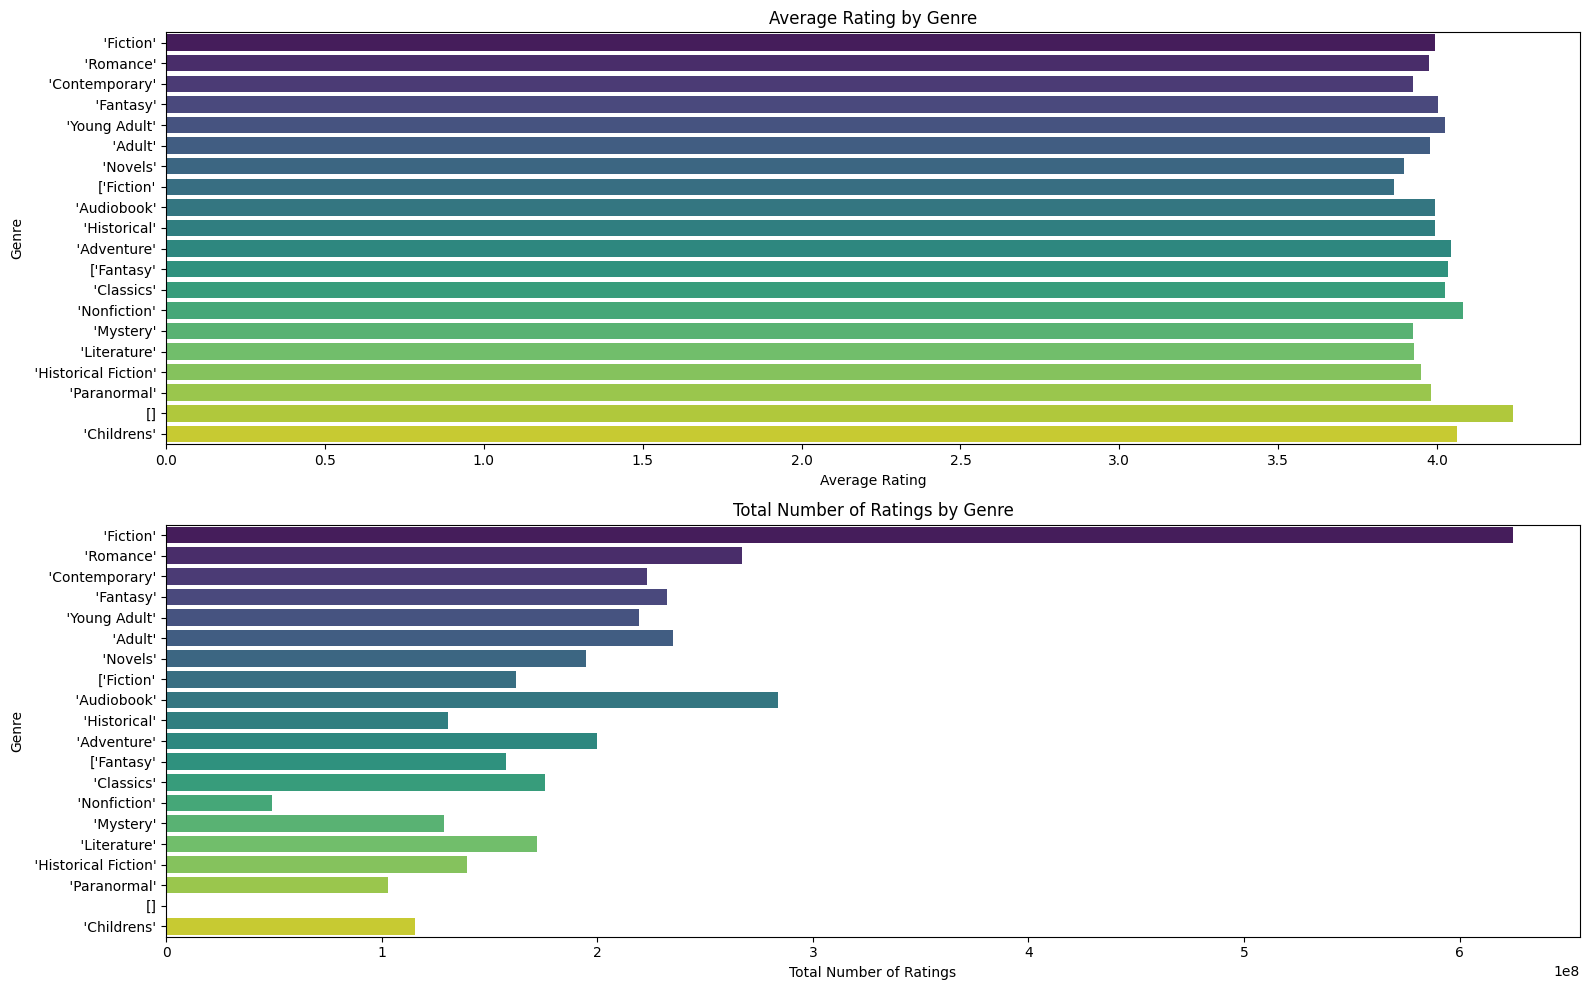

In [23]:
#Visualize the distribution of books across different genres

plt.figure(figsize=(16, 10))
top_genres = genre_stats.head(20)  

sns.barplot(x='num_books', y='genre', data=top_genres, palette='viridis')
plt.title('Top 20 Genres by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.show()


plt.figure(figsize=(16, 10))

# Average rating for each genre
plt.subplot(2, 1, 1)
sns.barplot(x='average_rating', y='genre', data=top_genres, palette='viridis')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')


# Total number of ratings for each genre
plt.subplot(2, 1, 2)
sns.barplot(x='total_numratings', y='genre', data=top_genres, palette='viridis')
plt.title('Total Number of Ratings by Genre')
plt.xlabel('Total Number of Ratings')
plt.ylabel('Genre')

plt.tight_layout()
plt.show()

In [24]:
#Time series analysis
#Making sure of the format of the dates
best['publishdate'] = pd.to_datetime(best['publishdate'], errors='coerce')
best['firstpublishdate'] = pd.to_datetime(best['firstpublishdate'], errors='coerce')

In [25]:
best = best.dropna(subset=['publishdate'])

In [26]:
#analyzing the trend of the number of books published each year
best['publish_year'] = best['publishdate'].dt.year
publication_trends = best.groupby('publish_year').size().reset_index(name='num_books')

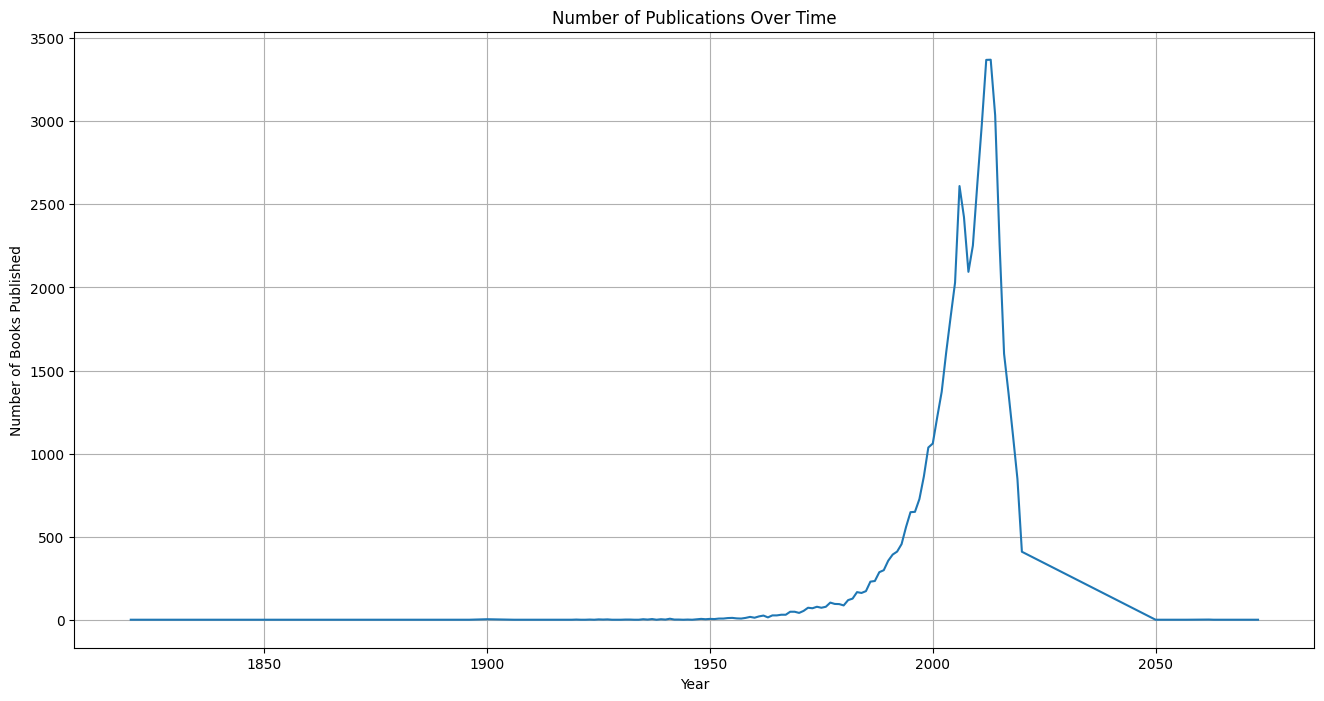

In [27]:
#plotting the number of books published each year
plt.figure(figsize=(16, 8))
sns.lineplot(data=publication_trends, x='publish_year', y='num_books')
plt.title('Number of Publications Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.grid(True)
plt.show()


In [28]:
filtered_publication_trends = publication_trends[
    (publication_trends['publish_year'] >= 1950) & 
    (publication_trends['publish_year'] <= 2020)
]

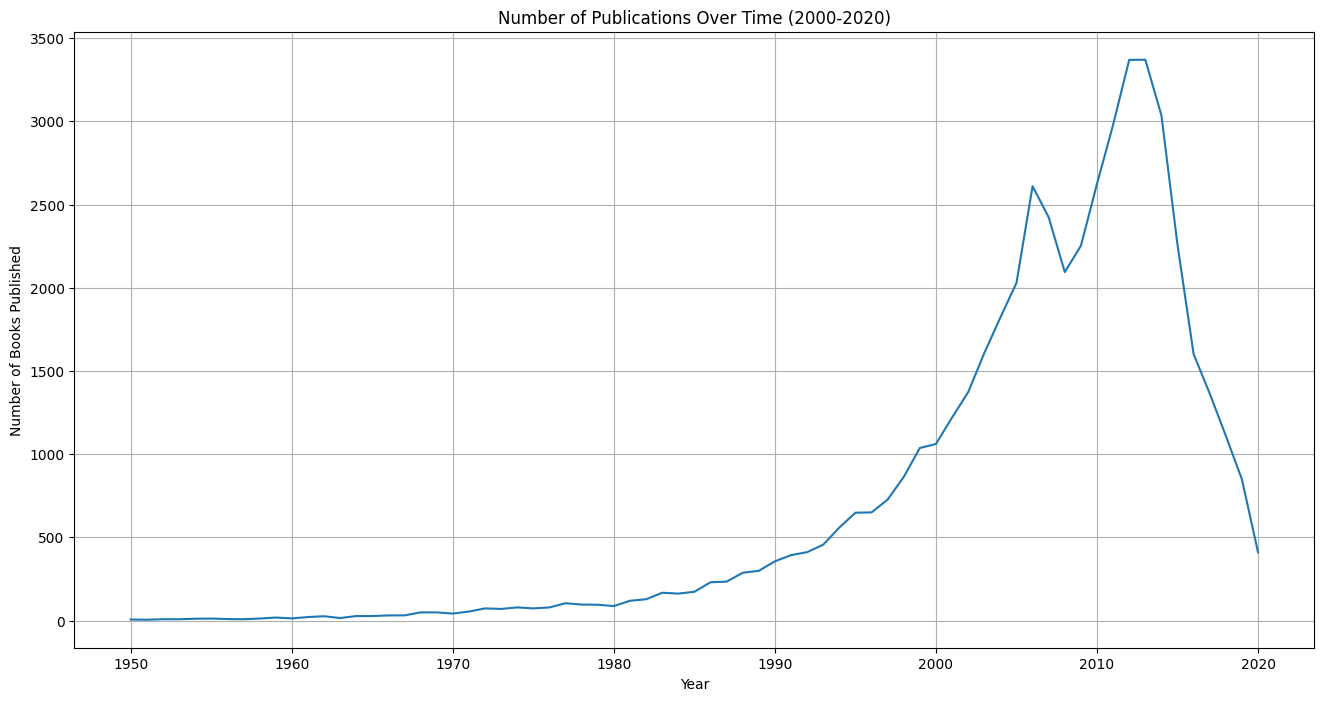

In [29]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=filtered_publication_trends, x='publish_year', y='num_books')
plt.title('Number of Publications Over Time (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.grid(True)
plt.show()

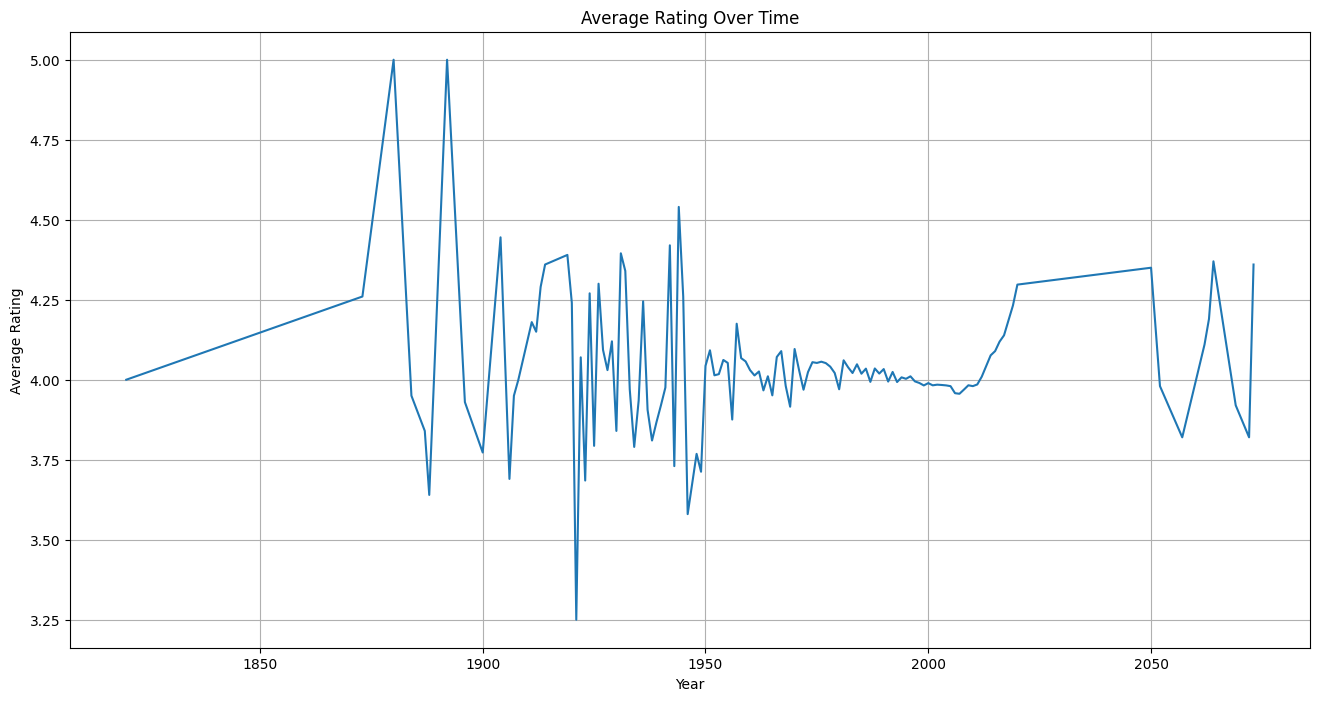

In [30]:
#analyzing trends in ratings or popularity over time

#Calculate average rating per year
rating_trends = best.groupby('publish_year')['rating'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(data=rating_trends, x='publish_year', y='rating')
plt.title('Average Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

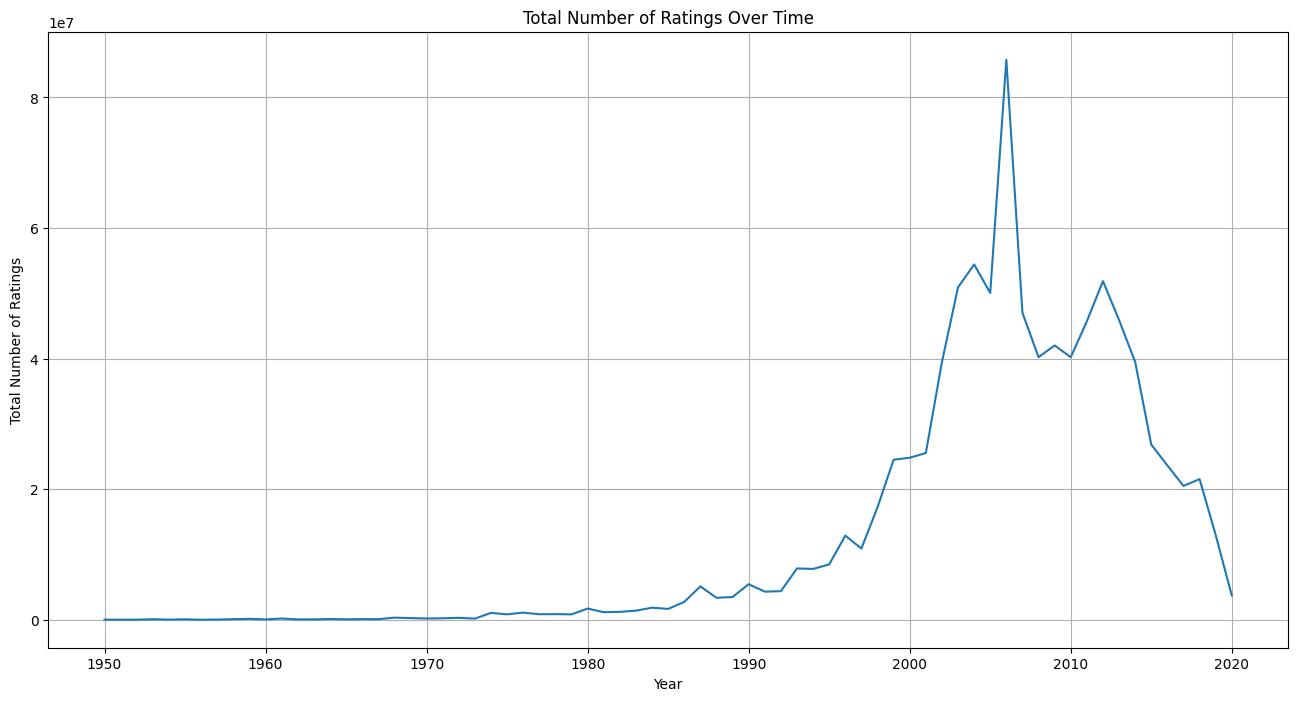

In [31]:
#analyzing trends in popularity (number of ratings) over time

#total number of ratings per year
popularity_trends = best.groupby('publish_year')['numratings'].sum().reset_index()

filtered_popularity_trends = popularity_trends[
    (publication_trends['publish_year'] >= 1950) & 
    (publication_trends['publish_year'] <= 2020)
]

plt.figure(figsize=(16, 8))
sns.lineplot(data=filtered_popularity_trends, x='publish_year', y='numratings')
plt.title('Total Number of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Total Number of Ratings')
plt.grid(True)
plt.show()

#### More on Descriptive analytics: Questions to explore

General Book Insights:
- What are the most common genres in the dataset?
- Which languages are the most common for the books in the dataset?
- Who are the most prolific authors in terms of the number of books written?

In [32]:
#As seen before, the top 20 most common genres are listed
exploded_best = best.explode('genres')
genre_counts = exploded_best['genres'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

most_common_genres = genre_counts.head(20) 

most_common_genres



,genre,count
0,'Fiction',23463
1,'Romance',11269
2,'Contemporary',9195
3,'Fantasy',8827
4,'Young Adult',7999
5,'Adult',6535
6,'Novels',5874
7,'Audiobook',5830
8,['Fiction',5815
9,'Historical',5648


So the top three on the podium are: Fantasy, Romance and Contemporary

In [33]:
#let's see the most common languages
language_counts = best['language'].value_counts().reset_index()
language_counts.columns = ['language', 'count']

most_common_languages = language_counts.head(20)  
most_common_languages


,language,count
0,English,41866
1,Unknown,3271
2,Arabic,879
3,Spanish,648
4,French,562
5,German,498
6,Indonesian,361
7,Portuguese,349
8,Italian,253
9,Dutch,213


As "unknown" was a placeholder for missing data we can say the top three are:
English, Arabic, Spanish

In [34]:
#number of books written by each author
author_counts = best['author'].value_counts().reset_index()
author_counts.columns = ['author', 'count']


most_prolific_authors = author_counts.head(20)  
most_prolific_authors

,author,count
0,Nora Roberts (Goodreads Author),86
1,Agatha Christie,72
2,Stephen King (Goodreads Author),65
3,Erin Hunter,57
4,Bella Forrest (Goodreads Author),53
5,Meg Cabot (Goodreads Author),51
6,Terry Pratchett,48
7,Karen Kingsbury (Goodreads Author),48
8,Bonnie Bryant,46
9,Lucian Bane (Goodreads Author),45


The most prolific authors are Nora Roberts, Agatha Christie and Stephen King (overview of the authors who have written the most books in this dataset)

Ratings and Reviews:
- What is the distribution of average ratings for the books?
- How do the number of ratings and the average rating correlate?
- Which books have the highest and lowest ratings?

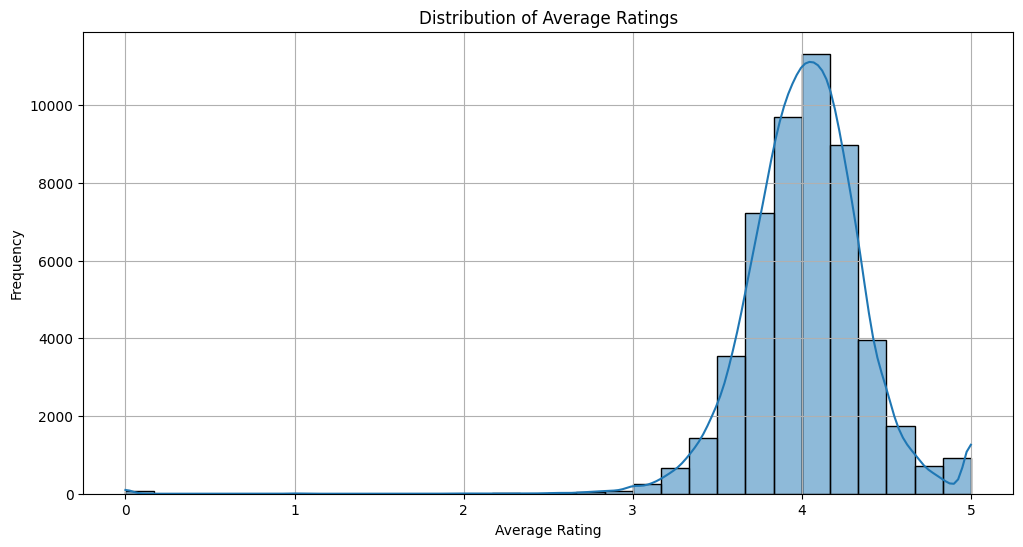

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(best['rating'], bins=30, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

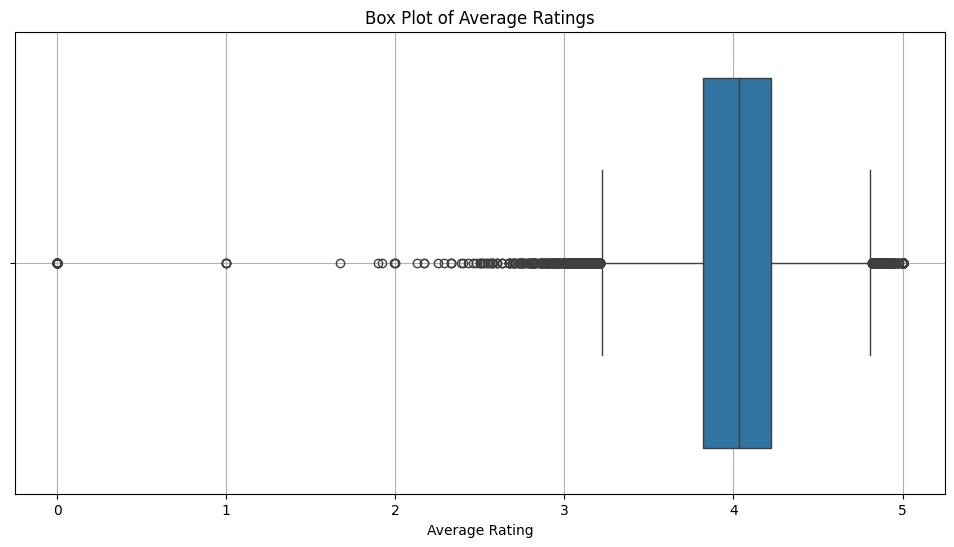

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=best['rating'])
plt.title('Box Plot of Average Ratings')
plt.xlabel('Average Rating')
plt.grid(True)
plt.show()

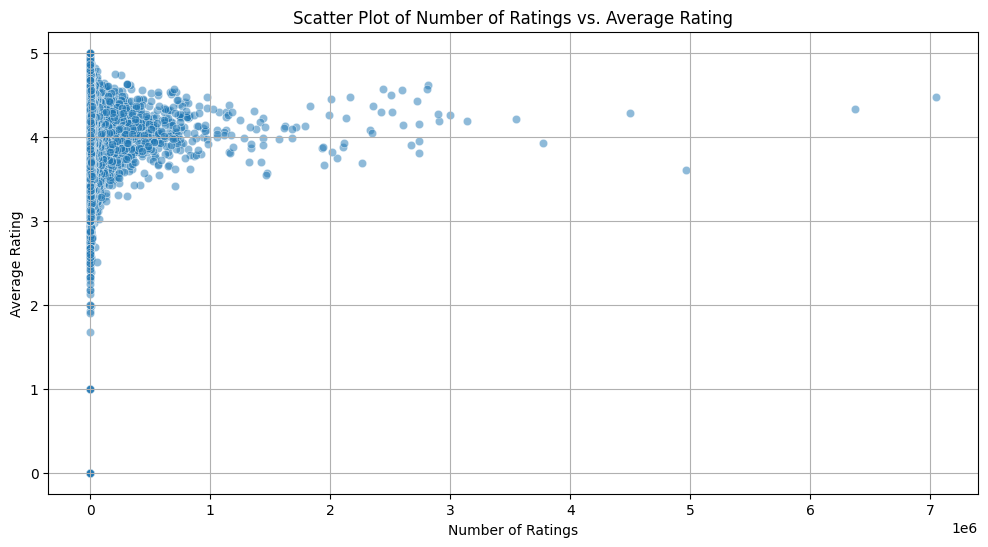

In [37]:
#scatter plot to visualize the relationship between the number of ratings and the average rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='numratings', y='rating', data=best, alpha=0.5)
plt.title('Scatter Plot of Number of Ratings vs. Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [38]:
from scipy.stats import pearsonr
#correlation coefficient
correlation_coefficient, p_value = pearsonr(best['numratings'], best['rating'])

print(f'Correlation coefficient between number of ratings and average rating: {correlation_coefficient}')
print(f'P-value of the correlation: {p_value}')

Correlation coefficient between number of ratings and average rating: 0.016218707952860994
P-value of the correlation: 0.0002603991083553822


In this case, the correlation coefficient is approximately 0.0162. This is very close to 0, indicating a very weak positive linear relationship between the number of ratings and the average rating. Essentially, the number of ratings a book has does not strongly affect its average rating.

The p-value measures the statistical significance of the observed correlation,
the p-value is approximately 0.00026, which is much lower than the common significance threshold of 0.05. This indicates that the very weak positive correlation is statistically significant. Even though the correlation is very weak, it is unlikely to have occurred by chance.

In [39]:
#books with the highest ratings

#top 10 books with the highest ratings
highest_rated_books = best.nlargest(10, 'rating')

#books with the lowest ratings
#top 10 books with the lowest ratings
lowest_rated_books = best.nsmallest(10, 'rating')

highest_rated_books

,bookid,title,series,author,rating,description,language,isbn,genres,characters,bookformat,edition,pages,publisher,publishdate,firstpublishdate,awards,numratings,likedpercent,setting,coverimg,bbescore,bbevotes,price,5_star,4_star,3_star,2_star,1_star,num_awards,publish_year
3989,37800210-gris-ange-2014,Gris Ange 2014,Not part of a series,Lucio Agustine Rosenkreutz Crăciunescu (Goodre...,5.0,Basé sur la biographie de Lucio Agustine Rosen...,"French, Middle (ca.1400-1600)",9782956137771,[[]],[],Paperback,Édition Transversale (Limitée),170,© Éditions Baudelaire,2014-01-08,NaT,[],9,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,789,8,0.0,9,0,0,0,0,0,2014
4009,37794574-das-geheimnis-der-blumen,Das geheimnis der blumen (DEU),Not part of a series,"Mykhaella Caponi, Lucio Agustine Rosenkreutz C...",5.0,"Dieses buch ist eine posthume werk, geschriebe...",German,9782956137757,[[]],[],Mass Market Paperback,Abgeleiteten Tab,227,© Aurora-Ausgabe,2017-05-19,NaT,[],8,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,784,8,0.0,8,0,0,0,0,0,2017
4405,17608096-obscured-darkness,Obscured Darkness (Family Secrets #2),Not part of a series,Rebekah McClew (Goodreads Author),5.0,"In the second book of the series, fleeing for ...",English,9780983002284,[[]],[],Paperback,Unknown,292,Center One Publishing,2012-11-13,NaT,[],9,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,691,7,113.6,9,0,0,0,0,0,2012
5118,30152061-rosto-inacabado-pequenos-segredos-alq...,Rosto Inacabado (Pequenos segredos alquímicos)...,Not part of a series,Lucio Agustine Rosenkreutz Crăciunescu (Goodre...,5.0,"Livro composto de 61 páginas, cor cheia. Esta ...",Portuguese,9782956137764,[[]],[],Nook,Edição de Fallujah,60,© U.Porto Edições,2013-05-10,2012-02-02,[],8,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,575,6,0.0,8,0,0,0,0,0,2013
5162,41009603-elliptical-door-a-multifaceted-overvi...,Elliptical door (A multifaceted overview) (US)...,Not part of a series,Lucio Agustine Rosenkreutz Crăciunescu (Goodre...,5.0,"Once again the negligible, him gives condensat...",English,9782956137733,[[]],[],Library Binding,Essais Promotionnels Courts (Dérivés #2),0,© Ocean Digital Edition,2013-08-13,2009-02-02,[],12,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,571,6,0.0,12,0,0,0,0,0,2013
5716,55477907-females-of-valor,Females of Valor,The Viking's Kurdish Love #2,Widad Akreyi (Goodreads Author),5.0,"The beautiful and willful medieval doctor, Ves...",English,9788284050317,[[]],[],Paperback,Unknown,342,NOVOREADS,2020-09-27,NaT,[],2,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,497,5,239.2,0,0,0,0,0,0,2020
5740,55506538-the-daughter-of-kurdland,The Daughter Of Kurdland: A Life Dedicated to ...,Not part of a series,Widad Akreyi (Goodreads Author),5.0,WINNER of the PACEM IN TERRIS PEACE AND FREEDO...,English,9788284050706,[[]],[],ebook,Unknown,0,NovoReads,2019-09-01,NaT,[],5,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,494,5,0.0,5,0,0,0,0,0,2019
6829,17259227-patience-s-love,Patience's Love,Not part of a series,Ronda Paige (Goodreads Author),5.0,"Two people, each with a secret which could end...",English,9780983002291,[[]],[],Paperback,First,344,Center One Books,2012-11-13,NaT,[],10,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,391,4,0.0,10,0,0,0,0,0,2012
8659,14288412-abstraction-in-theory---laws-of-physi...,Abstraction In Theory - Laws Of Physical Trans...,Not part of a series,Subhajit Ganguly (Goodreads Author),5.0,This book is a way forward towards the 'theory...,English,B0083WVHRM,[[]],[],Kindle Edition,Unknown,88,VMA Publications,2012-05-16,2012-05-14,[],6,100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,290,3,0.0,6,0,0,0,0,0,2012
9002,30152013-le-poin-on-pilot-edition,Le Poinçon « Pilot Edition »,Not part of a series,Lucio Agustine Rosenkreutz Crăciunescu (Goodre...,5.0,Le Poinçon « Pilot Edition » Edition Anniversa...,French,B00DOOPBXK,[[]],[],Paperback,Edition Anniversaire (Compilé),129,© Ank

Publication Trends:
- How has the number of books published changed over the years?
- Are there any noticeable trends in book length (number of pages) over time?

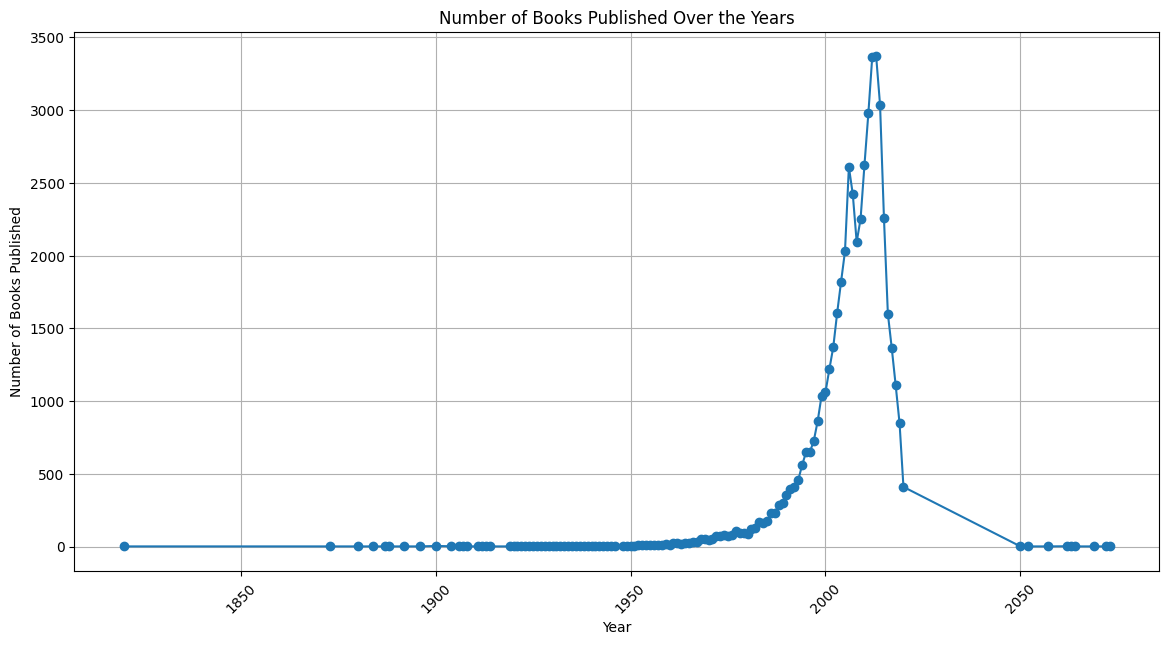

In [40]:
#Extract the year from the 'publishdate' column
best['publish_year'] = best['publishdate'].dt.year

# Group by year and count the number of books published each year
publication_trends = best.groupby('publish_year').size().reset_index(name='num_books')

plt.figure(figsize=(14, 7))
plt.plot(publication_trends['publish_year'], publication_trends['num_books'], marker='o')
plt.title('Number of Books Published Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

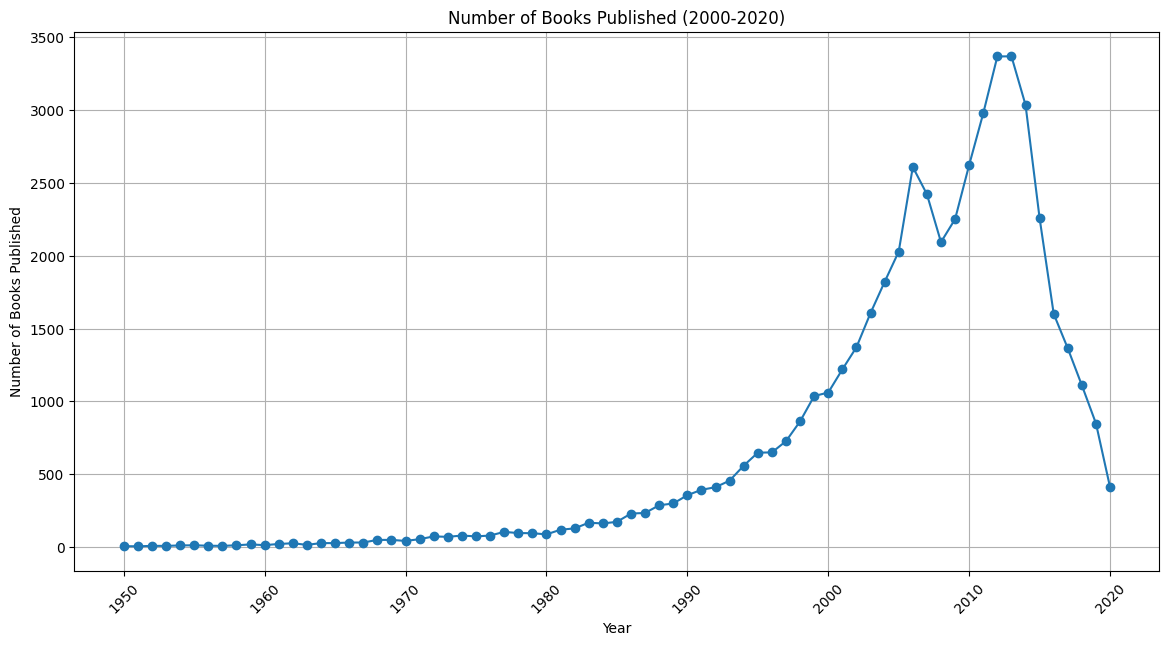

In [41]:
filtered_data = best[(best['publish_year'] >= 1950) & (best['publish_year'] <= 2020)]
publication_trends = filtered_data.groupby('publish_year').size().reset_index(name='num_books')

plt.figure(figsize=(14, 7))
plt.plot(publication_trends['publish_year'], publication_trends['num_books'], marker='o')
plt.title('Number of Books Published (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

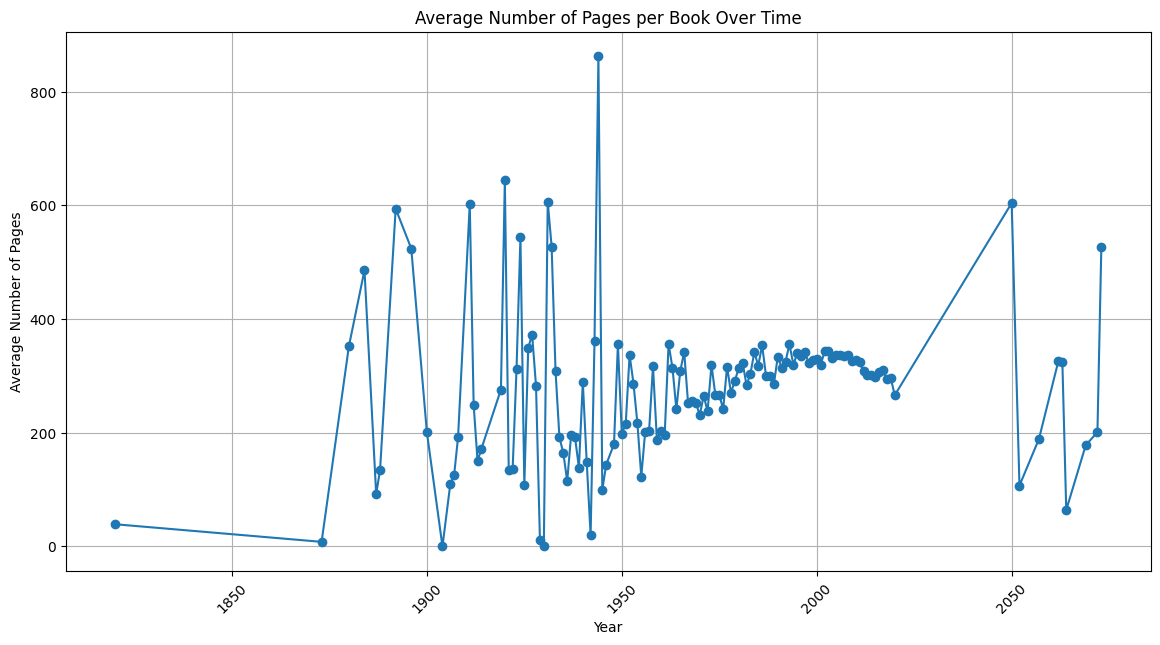

In [42]:
best['publish_year'] = best['publishdate'].dt.year
#average number of pages per year
avg_pages_per_year = best.groupby('publish_year')['pages'].mean().reset_index()


plt.figure(figsize=(14, 7))
plt.plot(avg_pages_per_year['publish_year'], avg_pages_per_year['pages'], marker='o')
plt.title('Average Number of Pages per Book Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Pages')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

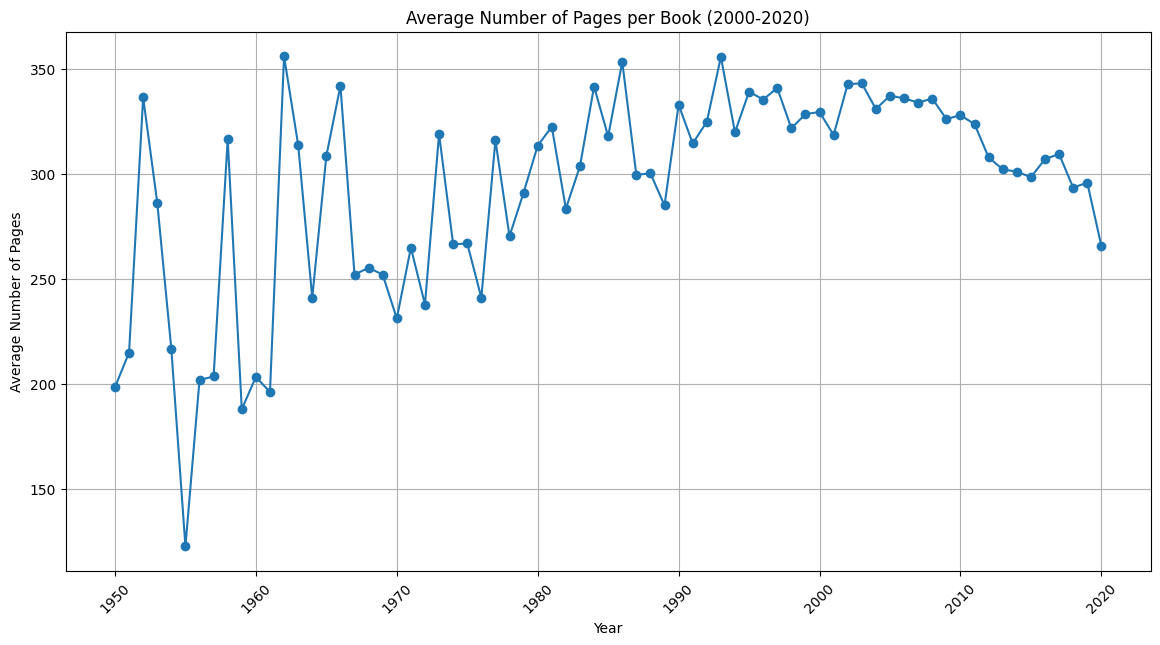

In [43]:

#year from the 'publishdate' column
best['publish_year'] = best['publishdate'].dt.year

filtered_data = best[(best['publish_year'] >= 1950) & (best['publish_year'] <= 2020)]

#average number of pages per year
avg_pages_per_year = filtered_data.groupby('publish_year')['pages'].mean().reset_index()


plt.figure(figsize=(14, 7))
plt.plot(avg_pages_per_year['publish_year'], avg_pages_per_year['pages'], marker='o')
plt.title('Average Number of Pages per Book (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Average Number of Pages')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Awards and Recognition:
- Which books and authors have received the most awards?
- Is there a correlation between the number of awards a book has received and its average rating?
- How do the number of awards vary across different genres?

In [44]:
#splitting awards and creating a list of individual awards
awards_list = best['awards'].str.split(',').explode().str.strip()

#grouping by book and counting awards
books_with_awards = awards_list.groupby(awards_list).size().reset_index(name='num_awards')
books_most_awards = books_with_awards.nlargest(10, 'num_awards')
books_most_awards_details = pd.merge(books_most_awards, best[['title', 'awards']], left_on='awards', right_on='awards', how='left')
print("Books with the Most Awards:")
print(books_most_awards_details[['title', 'num_awards']])


#aggregate by author
authors_with_awards = best.groupby('author')['awards'].apply(lambda x: x.str.split(',').explode().str.strip().count()).reset_index(name='num_awards')
authors_most_awards = authors_with_awards.nlargest(10, 'num_awards')
print("\nAuthors with the Most Awards:")
print(authors_most_awards)

Books with the Most Awards:
                                                   title  num_awards
0                                    Pride and Prejudice       40151
1                               The Chronicles of Narnia       40151
2      J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...       40151
3                   The Hitchhiker's Guide to the Galaxy       40151
4                                        The Giving Tree       40151
...                                                  ...         ...
40220                                          Fair Game          13
40221                                        Shadow Heir          13
40222                                  Sacrificial Magic          13
40223                                        By a Thread          13
40224                                    Wicked Business          13

[40225 rows x 2 columns]

Authors with the Most Awards:
                                          author  num_awards
23873            Stephen K

In [45]:
pride_and_prejudice = best[best['title'] == 'Pride and Prejudice']
num_awards = pride_and_prejudice['awards'].iloc[0]  # Assuming there's only one row for "Pride and Prejudice"
print(f"Pride and Prejudice has {num_awards} awards.")


Pride and Prejudice has [] awards.


In [46]:
awards_list = best['awards'].str.split(',').explode().str.strip()

#remove empty lists from awards_list
awards_list = awards_list[awards_list != '[]']

#group by book and counting awards
books_with_awards = awards_list.groupby(awards_list).size().reset_index(name='num_awards')

#books with the most awards
books_most_awards = books_with_awards.nlargest(10, 'num_awards')

#merge with 'best' to get titles and additional details
books_most_awards_details = pd.merge(books_most_awards, best[['title', 'awards']], left_on='awards', right_on='awards', how='left')
books_most_awards_details = books_most_awards_details.dropna(subset=['title'])

print("Books with the Most Awards:")
print(books_most_awards_details[['title', 'num_awards']])


Books with the Most Awards:
                    title  num_awards
3               Ugly Love          15
4          Archer's Voice          15
5           Maybe Someday          15
6    Gabriel's Redemption          15
7                     Raw          15
..                    ...         ...
82  Dirty Filthy Rich Men          13
83       The Duchess Deal          13
84              Egomaniac          13
85            Wait for It          13
86           Come Sundown          13

[83 rows x 2 columns]


In [47]:
#correlation between number of awards and average rating
merged_data = pd.merge(books_with_awards, best[['title', 'rating', 'awards']], on='awards', how='left')
#drop rows with NaN in 'num_awards' or 'rating'
merged_data = merged_data.dropna(subset=['num_awards', 'rating'])
correlation_coef, p_value = pearsonr(merged_data['num_awards'], merged_data['rating'])

print(f"Correlation coefficient between number of awards and average rating: {correlation_coef}")
print(f"P-value of the correlation: {p_value}")

Correlation coefficient between number of awards and average rating: 0.12620599109147537
P-value of the correlation: 3.365373433413325e-22


The coefficient value indicates a positive correlation but it's a relatively weak one.
The p-value is very small indicating strong evidence against the null hypothesis (that there is no correlation between awards and ratings). In other words, the correlation observed is likely not due to random chance.

awards alone do not strongly determine a book's rating. Other factors likely also play significant roles,
other variables not considered in this analysis could influence both awards received and ratings, such as genre, author popularity, or publication year.


C:\Users\Elsa\AppData\Local\Temp\ipykernel_6204\2453439174.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_awards', y='genres', data=genres_awards_counts.head(10), palette='viridis')


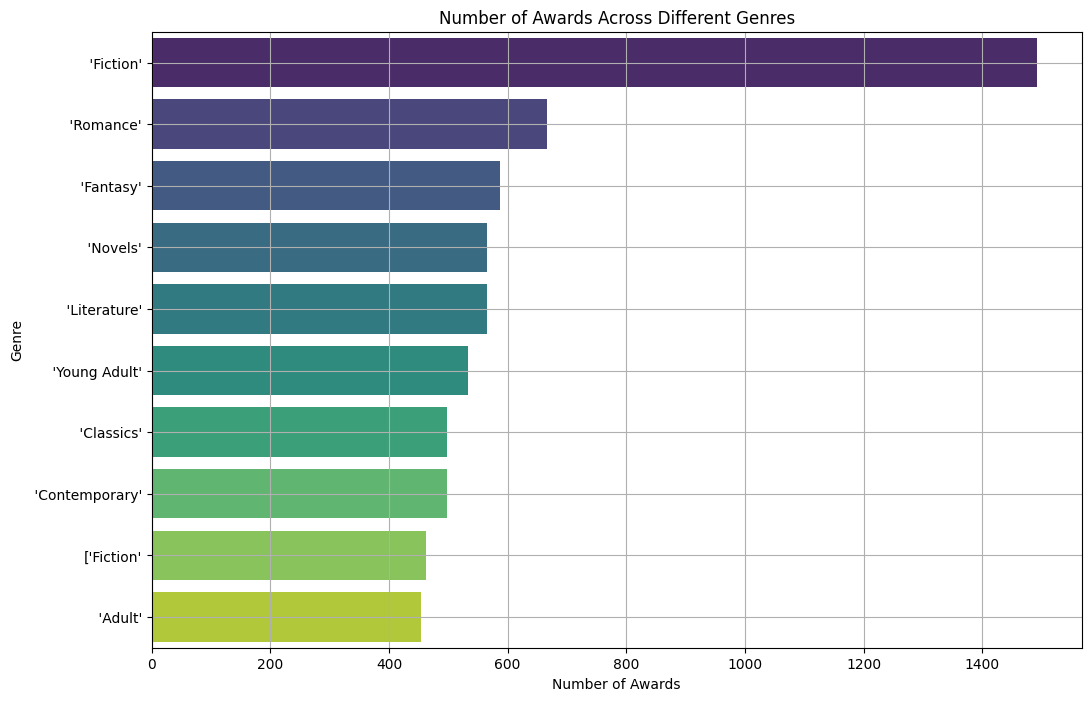

Genres with the Most Awards:
               genres  num_awards
596         'Fiction'        1493
1361        'Romance'         666
581         'Fantasy'         588
1168         'Novels'         566
959      'Literature'         565
1741    'Young Adult'         534
337        'Classics'         498
386    'Contemporary'         498
1966       ['Fiction'         463
45            'Adult'         454


In [48]:
genres_df = best['genres'].explode().reset_index(drop=True)
best['awards'] = best['awards'].fillna('[]')

#Explode awards to have one row per award per book
awards_list = best['awards'].apply(eval).explode().reset_index(drop=True)

#Combine 
genres_awards = pd.concat([genres_df, awards_list], axis=1).explode('awards')

#Group by 
genres_awards_counts = genres_awards.groupby('genres')['awards'].count().reset_index(name='num_awards')
genres_awards_counts = genres_awards_counts.sort_values(by='num_awards', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='num_awards', y='genres', data=genres_awards_counts.head(10), palette='viridis')
plt.title('Number of Awards Across Different Genres')
plt.xlabel('Number of Awards')
plt.ylabel('Genre')
plt.grid(True)
plt.show()


print("Genres with the Most Awards:")
print(genres_awards_counts.head(10))


Price Analysis:
- Analyzing the relationship between price and ratings
- Identifying trends in book pricing across different genres or publishers

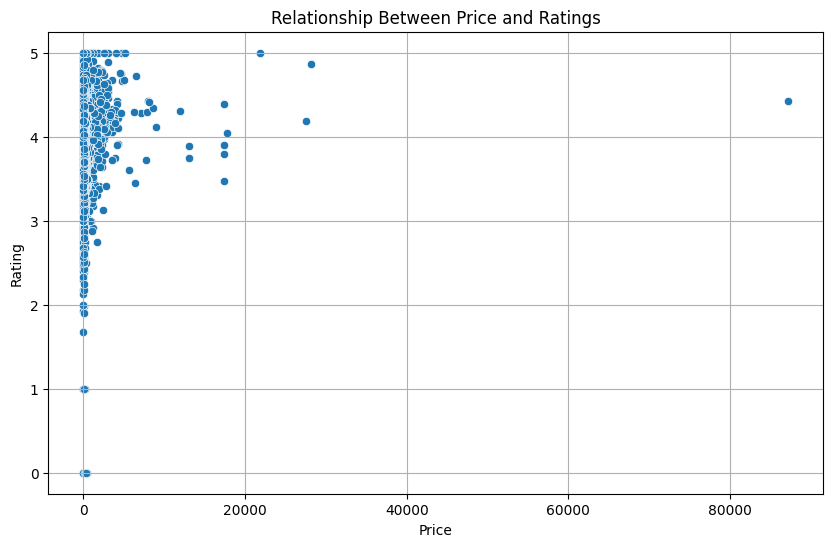

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', data=best)
plt.title('Relationship Between Price and Ratings')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

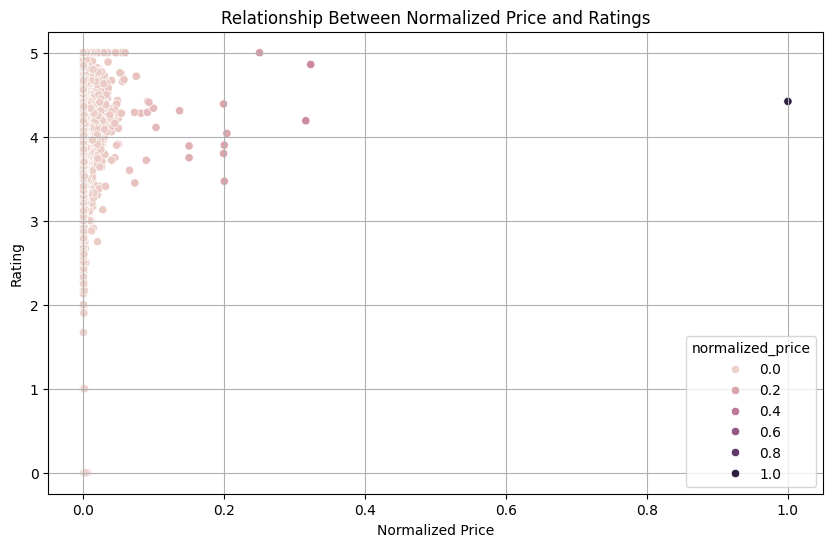

In [50]:
from sklearn.preprocessing import MinMaxScaler

#Normalize price to range [0, 1]
scaler = MinMaxScaler()
best['normalized_price'] = scaler.fit_transform(best[['price']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='normalized_price', y='rating', data=best, hue='normalized_price')
plt.title('Relationship Between Normalized Price and Ratings')
plt.xlabel('Normalized Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [51]:
#Filter relevant columns
books_filtered = best[['price', 'genres', 'publisher']]

#Remove rows with missing or zero prices (if any)
books_filtered = books_filtered[books_filtered['price'] > 0]
books_filtered = best[['price', 'genres', 'publisher']]

#Remove rows with missing or zero prices (if any)
books_filtered = books_filtered[books_filtered['price'] > 0]


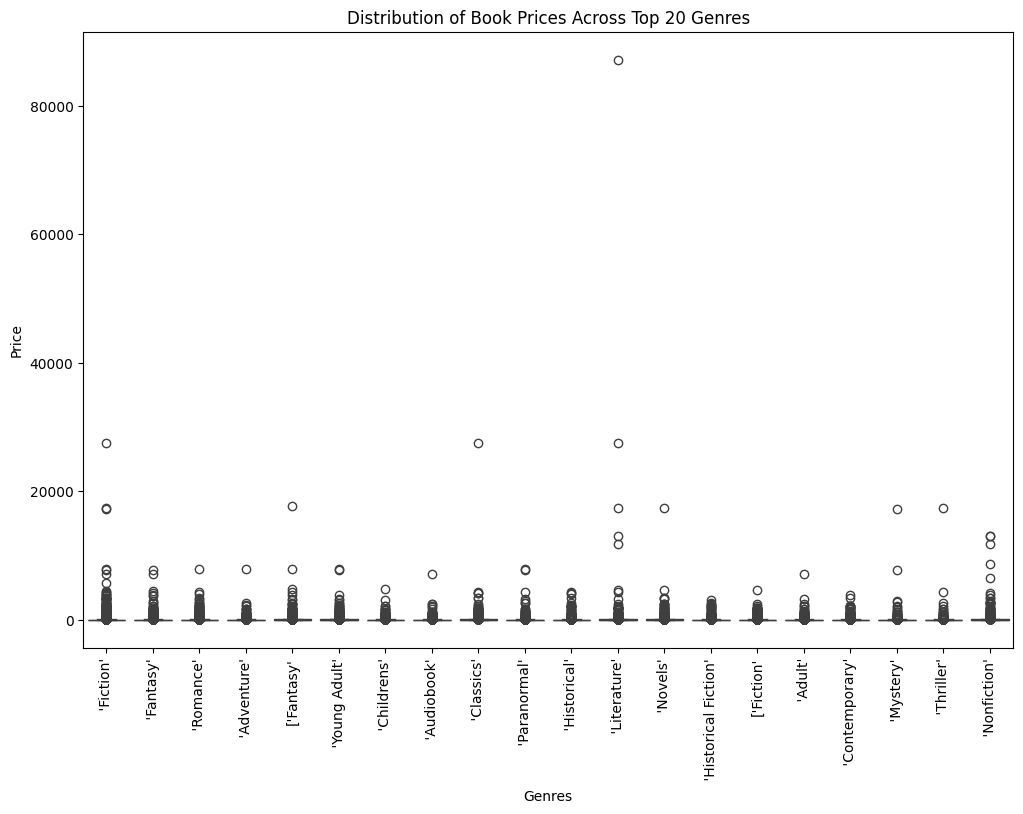

In [52]:
#Filter relevant columns
books_filtered = best[['price', 'genres', 'publisher']]
#Remove rows with missing or zero prices (if any)
books_filtered = books_filtered[books_filtered['price'] > 0]
books_filtered = books_filtered.explode('genres')

#frequency of each genre
top_genres = books_filtered['genres'].value_counts().nlargest(20).index.tolist()

#top 20 genres
books_filtered_top_genres = books_filtered[books_filtered['genres'].isin(top_genres)]


plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='price', data=books_filtered_top_genres)
plt.xticks(rotation=90)
plt.title('Distribution of Book Prices Across Top 20 Genres')
plt.xlabel('Genres')
plt.ylabel('Price')
plt.show()

C:\Users\Elsa\AppData\Local\Temp\ipykernel_6204\3113979576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_publisher.values, y=avg_price_publisher.index, palette='viridis')


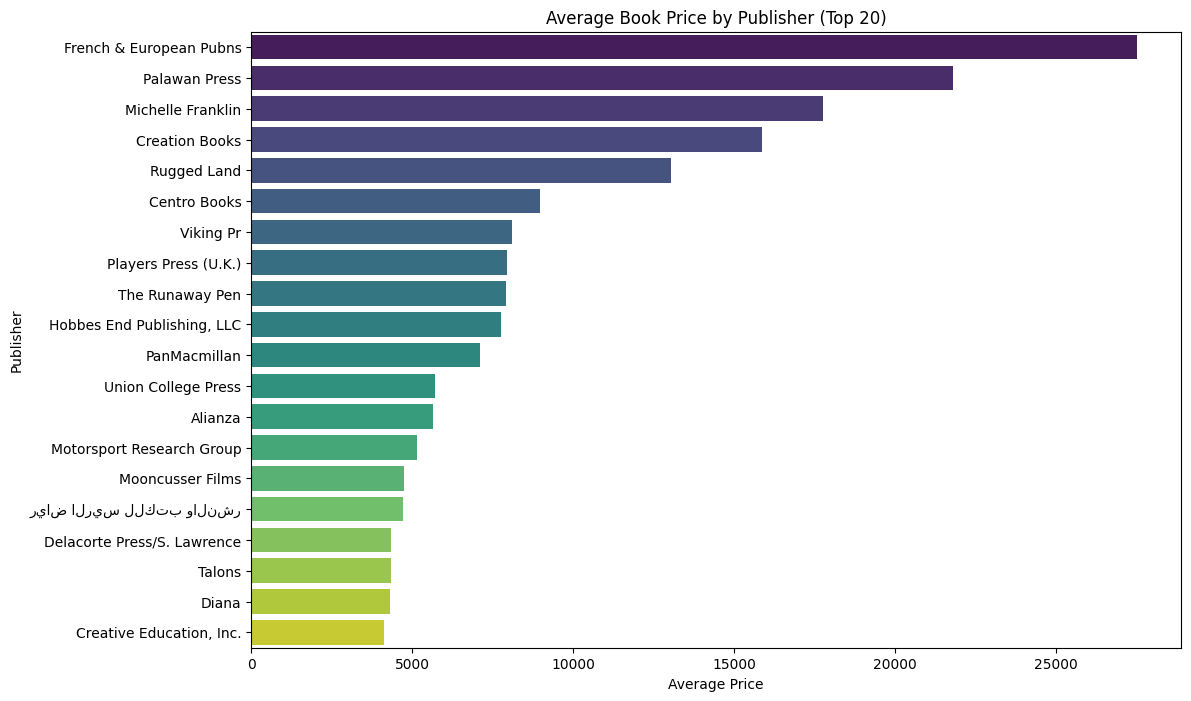

In [53]:
plt.figure(figsize=(12, 8))
avg_price_publisher = books_filtered.groupby('publisher')['price'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=avg_price_publisher.values, y=avg_price_publisher.index, palette='viridis')
plt.title('Average Book Price by Publisher (Top 20)')
plt.xlabel('Average Price')
plt.ylabel('Publisher')
plt.show()

#### More on Data-Driven Business Insights and Exploratory questions

C:\Users\Elsa\AppData\Local\Temp\ipykernel_6204\1835912172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['publish_year'] = filtered_data['publishdate'].dt.year


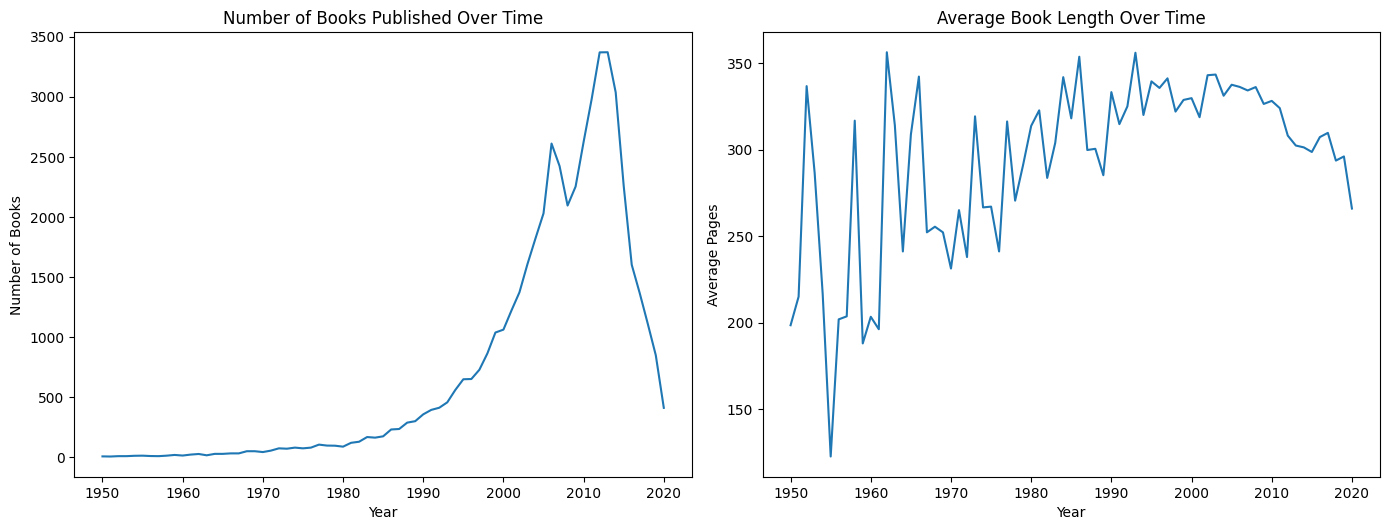

In [54]:
best['publishdate'] = pd.to_datetime(best['publishdate'], errors='coerce')

#data from 1950 to 2024
filtered_data = best[(best['publishdate'].dt.year >= 1950) & (best['publishdate'].dt.year <= 2024)]

#year from 'publishdate'
filtered_data['publish_year'] = filtered_data['publishdate'].dt.year

# Group by 'publish_year' and aggregate data
yearly_stats = filtered_data.groupby('publish_year').agg(
    num_books=('bookid', 'size'),                # Count of books per year
    mean_pages=('pages', 'mean'),                # Mean pages per year
    top_genres=('genres', lambda x: x.mode()[0]), # Most common genre per year
    top_formats=('bookformat', lambda x: x.mode()[0]) # Most common format per year
).reset_index()


plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
sns.lineplot(x='publish_year', y='num_books', data=yearly_stats)
plt.title('Number of Books Published Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Books')


plt.subplot(2, 2, 2)
sns.lineplot(x='publish_year', y='mean_pages', data=yearly_stats)
plt.title('Average Book Length Over Time')
plt.xlabel('Year')
plt.ylabel('Average Pages')

plt.tight_layout()
plt.show()

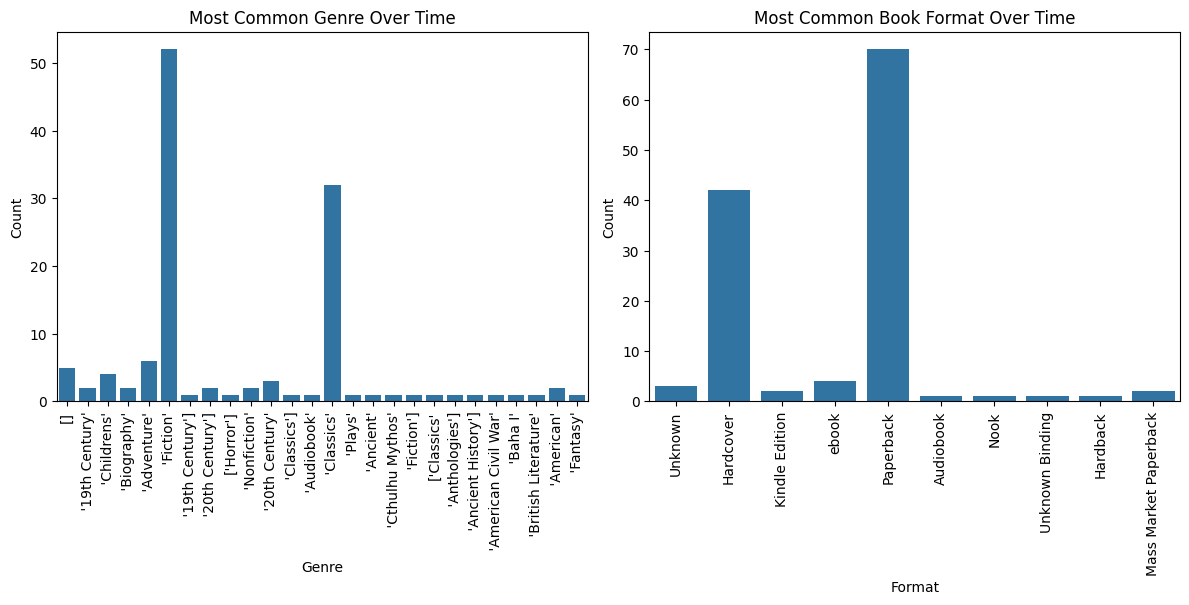

In [55]:
yearly_stats = pd.DataFrame(best)
yearly_stats['publishdate'] = pd.to_datetime(yearly_stats['publishdate'])

#explode genres column to handle lists
yearly_stats = yearly_stats.explode('genres')

#aggregate to find most common genre and book format each year
yearly_stats['publish_year'] = yearly_stats['publishdate'].dt.year
top_genres = yearly_stats.groupby('publish_year')['genres'].agg(lambda x: x.mode()[0]).reset_index()
top_formats = yearly_stats.groupby('publish_year')['bookformat'].agg(lambda x: x.mode()[0]).reset_index()


plt.figure(figsize=(12, 10))


plt.subplot(2, 2, 3)
sns.countplot(x='genres', data=top_genres)
plt.title('Most Common Genre Over Time')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
sns.countplot(x='bookformat', data=top_formats)
plt.title('Most Common Book Format Over Time')
plt.xlabel('Format')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

How do different editions and formats (e.g., hardcover, paperback) of books compare in terms of price and ratings?

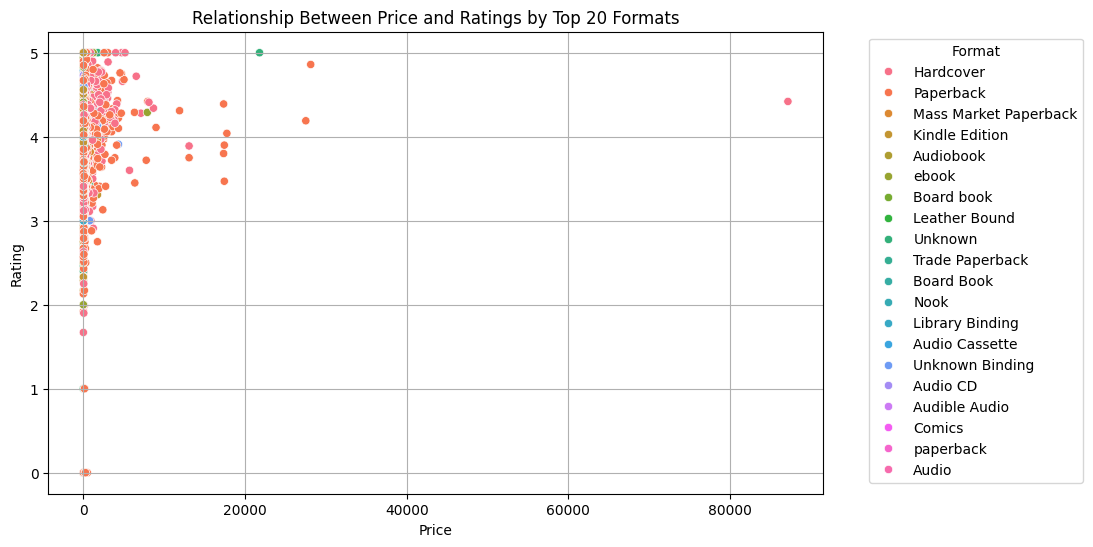

In [56]:
format_counts = best['bookformat'].value_counts()

#top 20 formats based on frequency
top_20_formats = format_counts.head(20).index.tolist()
books_filtered = best[best['bookformat'].isin(top_20_formats)]


plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', hue='bookformat', data=books_filtered)
plt.title('Relationship Between Price and Ratings by Top 20 Formats')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.legend(title='Format', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


C:\Users\Elsa\AppData\Local\Temp\ipykernel_6204\2111798662.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bookformat', y='price', data=books_filtered2, ci=None)
C:\Users\Elsa\AppData\Local\Temp\ipykernel_6204\2111798662.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bookformat', y='rating', data=books_filtered2, ci=None)


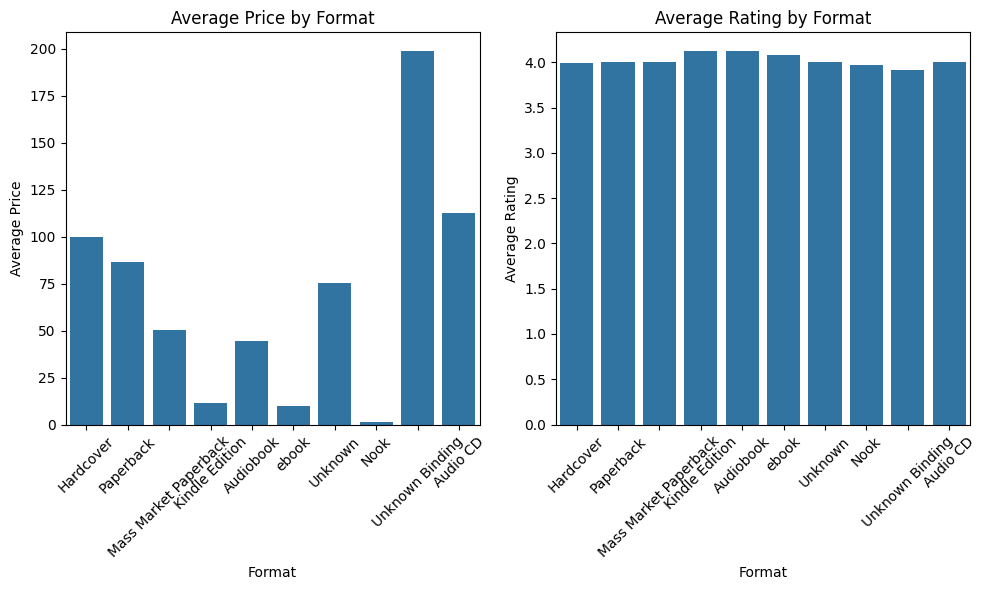

In [57]:
top_10_formats = format_counts.head(10).index.tolist()
books_filtered2 = best[best['bookformat'].isin(top_10_formats)]

plt.figure(figsize=(10, 6))

#avg Price Comparison
plt.subplot(1, 2, 1)
sns.barplot(x='bookformat', y='price', data=books_filtered2, ci=None)
plt.title('Average Price by Format')
plt.xlabel('Format')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

#avg Rating Comparison
plt.subplot(1, 2, 2)
sns.barplot(x='bookformat', y='rating', data=books_filtered2, ci=None)
plt.title('Average Rating by Format')
plt.xlabel('Format')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [58]:
best

,bookid,title,series,author,rating,description,language,isbn,genres,characters,bookformat,edition,pages,publisher,publishdate,firstpublishdate,awards,numratings,likedpercent,setting,coverimg,bbescore,bbevotes,price,5_star,4_star,3_star,2_star,1_star,num_awards,publish_year,normalized_price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"[['Young Adult', 'Fiction', 'Dystopia', 'Fa...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,2008-09-14,NaT,['Locus Award Nominee for Best Young Adult Boo...,6376780,96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,50.9,3444695,1921313,745221,171994,93557,41,2008,0.000584
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"[['Fantasy', 'Young Adult', 'Fiction', 'Mag...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,2004-09-28,2003-06-21,['Bram Stoker Award for Works for Young Reader...,2507623,98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,73.8,1593642,637516,222366,39573,14526,9,2004,0.000847
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"[['Classics', 'Fiction', 'Historical Fiction...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,Unknown,324,Harper Perennial Modern Classics,2006-05-23,2060-07-11,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,0.0,2363896,1333153,573280,149952,80794,4,2006,0.000000
3,1885.Pride_and_Prejudice,Pride and Prejudice,Not part of a series,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"[['Classics', 'Fiction', 'Romance', 'Histor...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,2000-10-10,2013-01-28,[],2998241,94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,0.0,1617567,816659,373311,113934,76770,0,2000,0.000000
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"[['Young Adult', 'Fantasy', 'Romance', 'Vam...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,Unknown,501,"Little, Brown and Company",2006-09-06,2005-10-05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1,1751460,1113682,1008686,542017,548674,25,2006,0.000024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"[['Vampires', 'Paranormal', 'Young Adult', ...",[],Nook,Unknown,0,Cheri Schmidt,2011-05-28,NaT,[],871,94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,0.0,311,310,197,42,11,0,2011,0.000000
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"[['Mystery', 'Young Adult']]",[],Paperback,First Edition,190,Bokheim Publishing,2011-08-05,2011-08-03,[],37,95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,0.0,16,14,5,2,0,0,2011,0.000000
52475,10815662-

Common keywords present in high rating books descriptions:

In [59]:
#content analysis test:
high_rated_books = best[best['rating'] >= 4.0]

In [60]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    #tokenize
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words


high_rated_books['clean_description'] = high_rated_books['description'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Elsa\AppData\Local\Temp\ipykernel_6204\3813701375.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rated_books['clean_description'] = high_rated_books['description'].apply(preprocess_text)


In [61]:
from collections import Counter

#combine all words in descriptions
all_words = [word for description in high_rated_books['clean_description'] for word in description]
word_freq = Counter(all_words)

common_words = word_freq.most_common(20) # Top 20 common words
print(common_words)


[('one', 13247), ('life', 12348), ('new', 10554), ('world', 8972), ('book', 8609), ('de', 7626), ('love', 7464), ('story', 6269), ('time', 6211), ('first', 5849), ('years', 4879), ('man', 4846), ('family', 4680), ('find', 4585), ('two', 4441), ('even', 4332), ('way', 4223), ('never', 4174), ('must', 4059), ('la', 3804)]


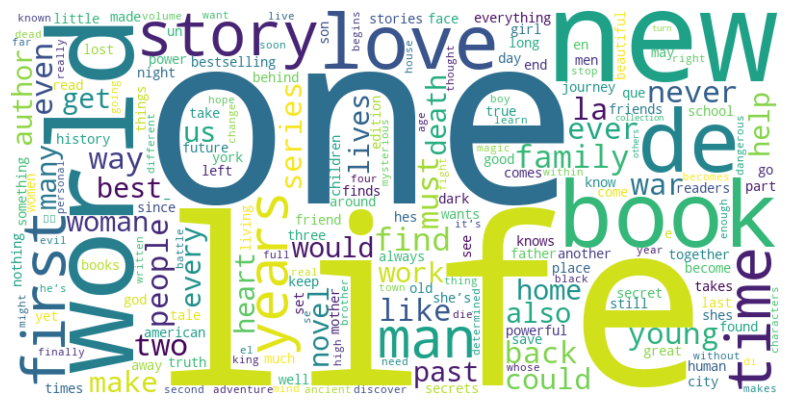

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
